# Projet P7 : Implémentez un modèle de scoring - Preprocessing & Feature engineering

## Contexte

Vous êtes Data Scientist au sein d'une société financière, nommée "Prêt à dépenser", qui propose des crédits à la consommation pour des personnes ayant peu ou pas du tout d'historique de prêt.

L’entreprise souhaite mettre en œuvre un outil de “scoring crédit” pour calculer la probabilité qu’un client rembourse son crédit, puis classifie la demande en crédit accordé ou refusé. Elle souhaite donc développer un algorithme de classification en s’appuyant sur des sources de données variées (données comportementales, données provenant d'autres institutions financières, etc.)

<b> MISSION 1 : </b>

Construire un modèle de scoring qui donnera une prédiction sur la probabilité de faillite d'un client de façon automatique.

Analyser les features qui contribuent le plus au modèle, d’une manière générale (feature importance globale) et au niveau d’un client (feature importance locale), afin, dans un soucis de transparence, de permettre à un chargé d’études de mieux comprendre le score attribué par le modèle.

Mettre en production le modèle de scoring de prédiction à l’aide d’une API et réaliser une interface de test de cette API.

<b> Approche MLOps : </b>

Afin de pouvoir faire évoluer régulièrement le modèle, mettre en œuvre une démarche de type MLOps d’automatisation et d’industrialisation de la gestion du cycle de vie du modèle (du tracking des expérimentations à l’analyse en production du data drift). 

Mettre en oeuvre au minimum les étapes orientées MLOps suivantes : 

- Dans le notebook d’entraînement des modèles, générer à l’aide de MLFlow un tracking d'expérimentations
- Lancer l’interface web 'UI MLFlow" d'affichage des résultats du tracking
- Réaliser avec MLFlow un stockage centralisé des modèles dans un “model registry”
- Tester le serving MLFlow
- Gérer le code avec le logiciel de version Git
- Partager le code sur Github pour assurer une intégration continue
- Utiliser Github Actions pour le déploiement continu et automatisé du code de l’API sur le cloud
- Concevoir des tests unitaires avec Pytest (ou Unittest) et les exécuter de manière automatisée lors du build réalisé par Github Actions

<b> Elaboration du modèle : </b>

Attention à deux points spécifiques au contexte métier : 

- Le déséquilibre entre le nombre de bons et de moins bons clients doit être pris en compte pour élaborer un modèle pertinent, avec une méthode au choix
- Le déséquilibre du coût métier entre un faux négatif (FN - mauvais client prédit bon client : donc crédit accordé et perte en capital) et un faux positif (FP - bon client prédit mauvais : donc refus crédit et manque à gagner en marge). Vous pourrez supposer, par exemple, que le coût d’un FN est dix fois supérieur au coût d’un FP. Vous créerez un score “métier” (minimisation du coût d’erreur de prédiction des FN et FP) pour comparer les modèles, afin de choisir le meilleur modèle et ses meilleurs hyperparamètres. Attention cette minimisation du coût métier doit passer par l’optimisation du seuil qui détermine, à partir d’une probabilité, la classe 0 ou 1 (un “predict” suppose un seuil à 0.5 qui n’est pas forcément l’optimum). En parallèle, maintenez pour comparaison et contrôle des mesures plus techniques, telles que l’AUC et l’accuracy.

Kernels Kaggle utilisés pour l’analyse exploratoire, la préparation des données et le feature engineering :
    
    - https://www.kaggle.com/code/willkoehrsen/start-here-a-gentle-introduction/notebook
    - https://www.kaggle.com/code/willkoehrsen/introduction-to-manual-feature-engineering
    - https://www.kaggle.com/code/willkoehrsen/introduction-to-manual-feature-engineering-p2
    - https://www.kaggle.com/code/willkoehrsen/introduction-to-feature-selection
    
    - https://www.kaggle.com/code/jsaguiar/lightgbm-with-simple-features/script --> pas utilisé pour le moment

## Etapes du projet :

Elaboration d'un modèle de prédiction sous forme d’une API qui permet de calculer la probabilité de défaut du client, ainsi que sa classe (accepté ou refusé), déployer l'API sur une plateforme Cloud.

- <b> Etape préliminaire : </b> Importation des données ( --> NoteBook1 : Preparation des données )
- <b> Etape 1 : </b> EDA et feature engineering sur la table principale application ( --> NoteBook1 ) 
- <b> Etape 2 : </b> Ajout des tables bureau et bureau_balance ( --> NoteBook1 )
- <b> Etape 3 : </b> Ajout des tables previous_application, POS_CASH_balance, installments_payments et credit_card_balance ( --> NoteBook1 )

- <b> Etape 4 : </b> EDA et Feature selection, feature engineering ( --> NoteBook1 )

- <b> Etape 5 : </b> Elaboration des modèles avec un tracking d'expérimentations (avec Cross-Validation et optimisation des hyperparamètres, via GridsearchCV ou équivalent)
- <b> Etape 6 : </b> Création de l'API (Notebook ou une application Streamlit pour réaliser en local l’interface de test de l’API)
- <b> Etape 7 : </b> Déploiement de l’API sur une plateforme Cloud (de préférence une solution gratuite)
- <b> Etape 8 : </b> Analyse du Data Drift (evidently)

# Data : Home Credit Default Risk Competition

The data is provided by [Home Credit](http://www.homecredit.net/about-us.aspx), a service dedicated to provided lines of credit (loans) to the unbanked population. Predicting whether or not a client will repay a loan or have difficulty is a critical business need, and Home Credit is hosting this competition on Kaggle to see what sort of models the machine learning community can develop to help them in this task. 

There are 7 different sources of data:

* application_train/application_test: the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature `SK_ID_CURR`. The training application data comes with the `TARGET` indicating 0: the loan was repaid or 1: the loan was not repaid. 
* bureau: data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* bureau_balance: monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length. 
* previous_application: previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature `SK_ID_PREV`. 
* POS_CASH_BALANCE: monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* installments_payment: payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment. 

This diagram shows how all of the data is related:

![image](https://storage.googleapis.com/kaggle-media/competitions/home-credit/home_credit.png)

Moreover, we are provided with the definitions of all the columns (in `HomeCredit_columns_description.csv`) and an example of the expected submission file. 

In this notebook, we will stick to using only the main application training and testing data. Although if we want to have any hope of seriously competing, we need to use all the data, for now we will stick to one file which should be more manageable. This will let us establish a baseline that we can then improve upon. With these projects, it's best to build up an understanding of the problem a little at a time rather than diving all the way in and getting completely lost! 


## ETAPE PRELIMINAIRE : Importation des données

ETAPE 0
- collecter et préparer les données
- mettre en place un environnement de travail configuré avec les bibliothèques de traitement de données et de machine learning

## Imports

We are using a typical data science stack: `numpy`, `pandas`, `sklearn`, `matplotlib`. 

In [88]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 
import missingno as msno

# Models
import lightgbm as lgb

# sklearn methods
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

# File system manangement
import os

# Suppress warnings 
# import warnings
# warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Memory management
import gc 

# Outils MLOps
import mlflow
import mlflow.sklearn

First, we can list all the available data files. There are a total of 9 files: 1 main file for training (with target) 1 main file for testing (without the target), 1 example submission file, and 6 other files containing additional information about each loan. 

In [15]:
pwd

'C:\\Users\\druar\\OneDrive\\Documents\\01_Formations\\1_Outils_ET_Metier\\2024_DataScientist\\ProjetsPython\\P7'

In [16]:
# List files available
print(os.listdir("./data/"))

['application_test.csv', 'application_train.csv', 'app_test.csv', 'app_test_domain.csv', 'app_test_poly.csv', 'app_train.csv', 'app_train_domain.csv', 'app_train_poly.csv', 'bureau.csv', 'bureau_balance.csv', 'cols.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv', 'test_all.csv', 'test_all_858.csv', 'test_bureau.csv', 'train_all.csv', 'train_all_859.csv', 'train_bureau.csv']


## ETAPE 1 : Exploratory Data Analysis sur la table principale 'Application'

ETAPE 1
    
    1. Importer les données de la table 'Application' 
    2. Comprendre les données (distribution, valeurs manquantes, encodage des variables)
    3. Analyser les données 
    4. Création de variables pertinentes

### 1. Importer les données de la table 'Application'

In [19]:
# Training data
app_train = pd.read_csv('./data/application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

The training data has 307511 observations (each one a separate loan) and 122 features (variables) including the `TARGET` (the label we want to predict).

In [21]:
# Testing data features
app_test = pd.read_csv('./data/application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

The test set is considerably smaller and lacks a `TARGET` column. 

### 2. Comprendre les données (distribution, valeurs manquantes, encodage des variables)

#### -- Examine the Distribution of the Target Column --

The target is what we are asked to predict: either a 0 for the loan was repaid on time, or a 1 indicating the client had payment difficulties. We can first examine the number of loans falling into each category.

In [25]:
app_train['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

From this information, we see this is an [_imbalanced class problem_](http://www.chioka.in/class-imbalance-problem/). There are far more loans that were repaid on time than loans that were not repaid. Once we get into more sophisticated machine learning models, we can [weight the classes](http://xgboost.readthedocs.io/en/latest/parameter.html) by their representation in the data to reflect this imbalance. 

#### -- Examine Missing Values --

Next we can look at the number and percentage of missing values in each column. 

In [6]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [29]:
# Missing values statistics
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


Missing Values  % of Total Values
COMMONAREA_MEDI                   214865               69.9
COMMONAREA_AVG                    214865               69.9
COMMONAREA_MODE                   214865               69.9
NONLIVINGAPARTMENTS_MEDI          213514               69.4
NONLIVINGAPARTMENTS_MODE          213514               69.4
NONLIVINGAPARTMENTS_AVG           213514               69.4
FONDKAPREMONT_MODE                210295               68.4
LIVINGAPARTMENTS_MODE             210199               68.4
LIVINGAPARTMENTS_MEDI             210199               68.4
LIVINGAPARTMENTS_AVG              210199               68.4
FLOORSMIN_MODE                    208642               67.8
FLOORSMIN_MEDI                    208642               67.8
FLOORSMIN_AVG                     208642               67.8
YEARS_BUILD_MODE                  204488               66.5
YEARS_BUILD_MEDI                  204488               66.5
YEARS_BUILD_AVG                   204488               66.5
OWN_CAR_AGE                       202929               66.0
LANDAREA_AVG                      182590               59.4
LANDAREA_MEDI                     182590               59.4
LANDAREA_MODE                     182590               59.4

When it comes time to build our machine learning models, we will have to fill in these missing values (known as imputation). In later work, we will use models such as XGBoost that can [handle missing values with no need for imputation](https://stats.stackexchange.com/questions/235489/xgboost-can-handle-missing-data-in-the-forecasting-phase). Another option would be to drop columns with a high percentage of missing values, although it is impossible to know ahead of time if these columns will be helpful to our model. Therefore, we will keep all of the columns for now.

#### -- Column Types --

Let's look at the number of columns of each data type. `int64` and `float64` are numeric variables ([which can be either discrete or continuous](https://stats.stackexchange.com/questions/206/what-is-the-difference-between-discrete-data-and-continuous-data)). `object` columns contain strings and are  [categorical features.](http://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/what-are-categorical-discrete-and-continuous-variables/) . 

In [32]:
# Number of each type of column
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

Let's now look at the number of unique entries in each of the `object` (categorical) columns.

In [34]:
# Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

Most of the categorical variables have a relatively small number of unique entries. We will need to find a way to deal with these categorical variables! 

In [36]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


#### -- Label Encoding and One-Hot Encoding --

For any categorical variable (`dtype == object`) with 2 unique categories, we will use label encoding, and for any categorical variable with more than 2 unique categories, we will use one-hot encoding. 

For label encoding, we use the Scikit-Learn `LabelEncoder` and for one-hot encoding, the pandas `get_dummies(df)` function.

In [38]:
df_object = app_train.select_dtypes(include=['object'])
missing_values = missing_values_table(df_object)
missing_values.head(10)

Your selected dataframe has 13 columns.
There are 6 columns that have missing values.


Missing Values  % of Total Values
FONDKAPREMONT_MODE           210295               68.4
WALLSMATERIAL_MODE           156341               50.8
HOUSETYPE_MODE               154297               50.2
EMERGENCYSTATE_MODE          145755               47.4
OCCUPATION_TYPE               96391               31.3
NAME_TYPE_SUITE                1292                0.4

In [39]:
def one_hot_encoder(df, nan_as_category = True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

In [40]:
app_train, cat_cols_train = one_hot_encoder(app_train)
app_test, cat_cols_test = one_hot_encoder(app_test)

In [41]:
print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 256)
Testing Features shape:  (48744, 252)


#### -- Aligning Training and Testing Data --

There need to be the same features (columns) in both the training and testing data. One-hot encoding has created more columns in the training data because there were some categorical variables with categories not represented in the testing data. To remove the columns in the training data that are not in the testing data, we need to `align` the dataframes. First we extract the target column from the training data (because this is not in the testing data but we need to keep this information). When we do the align, we must make sure to set `axis = 1` to align the dataframes based on the columns and not on the rows!

In [43]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 253)
Testing Features shape:  (48744, 252)


The training and testing datasets now have the same features which is required for machine learning. The number of features has grown significantly due to one-hot encoding. At some point we probably will want to try [dimensionality reduction (removing features that are not relevant)](https://en.wikipedia.org/wiki/Dimensionality_reduction) to reduce the size of the datasets.

### 3. Analyser les données

#### -- Anomalies --

One problem we always want to be on the lookout for when doing EDA is anomalies within the data. These may be due to mis-typed numbers, errors in measuring equipment, or they could be valid but extreme measurements. One way to support anomalies quantitatively is by looking at the statistics of a column using the `describe` method. The numbers in the `DAYS_BIRTH` column are negative because they are recorded relative to the current loan application. To see these stats in years, we can mutliple by -1 and divide by the number of days in a year:


In [46]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

Those ages look reasonable. There are no outliers for the age on either the high or low end. How about the days of employment? 

In [48]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

That doesn't look right! The maximum value (besides being positive) is about 1000 years! 

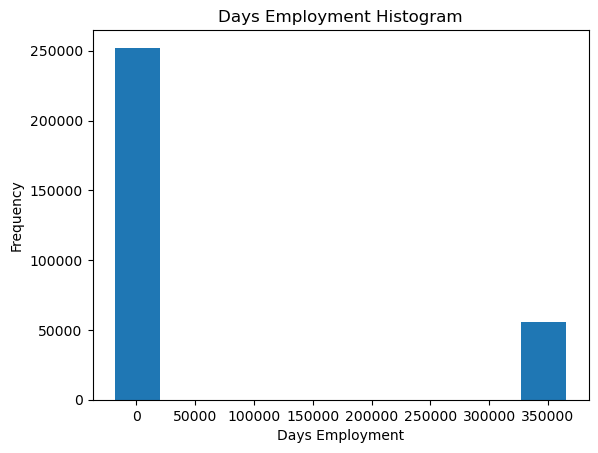

In [50]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

Just out of curiousity, let's subset the anomalous clients and see if they tend to have higher or low rates of default than the rest of the clients.

In [52]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


Well that is extremely interesting! It turns out that the anomalies have a lower rate of default. 

Handling the anomalies depends on the exact situation, with no set rules. One of the safest approaches is just to set the anomalies to a missing value and then have them filled in (using Imputation) before machine learning. In this case, since all the anomalies have the exact same value, we want to fill them in with the same value in case all of these loans share something in common. The anomalous values seem to have some importance, so we want to tell the machine learning model if we did in fact fill in these values. As a solution, we will fill in the anomalous values with not a number (`np.nan`) and then create a new boolean column indicating whether or not the value was anomalous.



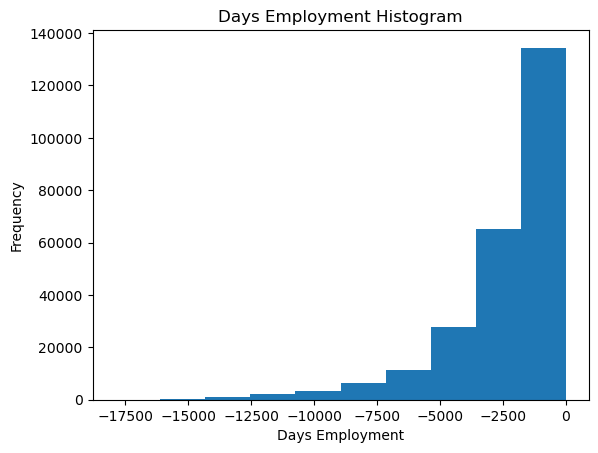

In [54]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

The distribution looks to be much more in line with what we would expect, and we also have created a new column to tell the model that these values were originally anomalous (becuase we will have to fill in the nans with some value, probably the median of the column). The other columns with `DAYS` in the dataframe look to be about what we expect with no obvious outliers. 

As an extremely important note, anything we do to the training data we also have to do to the testing data. Let's make sure to create the new column and fill in the existing column with `np.nan` in the testing data.

In [56]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test.replace({'DAYS_EMPLOYED': {365243: np.nan}}, inplace=True)

print('There are %d anomalies in the test data out of %d entries' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


#### -- Correlations --

Now that we have dealt with the categorical variables and the outliers, let's continue with the EDA. One way to try and understand the data is by looking for correlations between the features and the target. We can calculate the Pearson correlation coefficient between every variable and the target using the `.corr` dataframe method.

The correlation coefficient is not the greatest method to represent "relevance" of a feature, but it does give us an idea of possible relationships within the data. Some [general interpretations of the absolute value of the correlation coefficent](http://www.statstutor.ac.uk/resources/uploaded/pearsons.pdf) are:


* .00-.19 “very weak”
*  .20-.39 “weak”
*  .40-.59 “moderate”
*  .60-.79 “strong”
* .80-1.0 “very strong”


In [58]:
# Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 CODE_GENDER_M                     0.054713
DAYS_LAST_PHONE_CHANGE            0.055218
NAME_INCOME_TYPE_Working          0.057481
REGION_RATING_CLIENT              0.058899
REGION_RATING_CLIENT_W_CITY       0.060893
DAYS_EMPLOYED                     0.074958
DAYS_BIRTH                        0.078239
TARGET                            1.000000
CODE_GENDER_nan                        NaN
NAME_INCOME_TYPE_nan                   NaN
NAME_EDUCATION_TYPE_nan                NaN
NAME_FAMILY_STATUS_nan                 NaN
NAME_HOUSING_TYPE_nan                  NaN
WEEKDAY_APPR_PROCESS_START_nan         NaN
ORGANIZATION_TYPE_nan                  NaN
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                           -0.178919
EXT_SOURCE_2                           -0.160472
EXT_SOURCE_1                           -0.155317
NAME_EDUCATION_TYPE_Higher education   -0.056593
CODE_GENDER_F                          -0.054704
NAME_INCOME_TYPE_Pensi

Let's take a look at some of more significant correlations: the `DAYS_BIRTH` is the most positive correlation. (except for `TARGET` because the correlation of a variable with itself is always 1!) Looking at the documentation, `DAYS_BIRTH` is the age in days of the client at the time of the loan in negative days (for whatever reason!). The correlation is positive, but the value of this feature is actually negative, meaning that as the client gets older, they are less likely to default on their loan (ie the target == 0). That's a little confusing, so we will take the absolute value of the feature and then the correlation will be negative.

#### -- Effect of Age on Repayment --

In [61]:
# Find the correlation of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982712

As the client gets older, there is a negative linear relationship with the target meaning that as clients get older, they tend to repay their loans on time more often. 

Let's start looking at this variable. First, we can make a histogram of the age. We will put the x axis in years to make the plot a little more understandable.

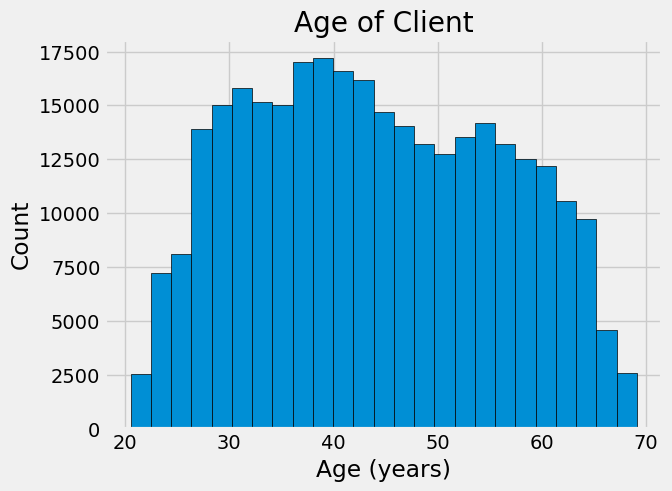

In [63]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

By itself, the distribution of age does not tell us much other than that there are no outliers as all the ages are reasonable. To visualize the effect of the age on the target, we will next make a [kernel density estimation plot](https://en.wikipedia.org/wiki/Kernel_density_estimation) (KDE) colored by the value of the target. A [kernel density estimate plot shows the distribution of a single variable](https://chemicalstatistician.wordpress.com/2013/06/09/exploratory-data-analysis-kernel-density-estimation-in-r-on-ozone-pollution-data-in-new-york-and-ozonopolis/) and can be thought of as a smoothed histogram (it is created by computing a kernel, usually a Gaussian, at each data point and then averaging all the individual kernels to develop a single smooth curve). We will use the seaborn `kdeplot` for this graph.

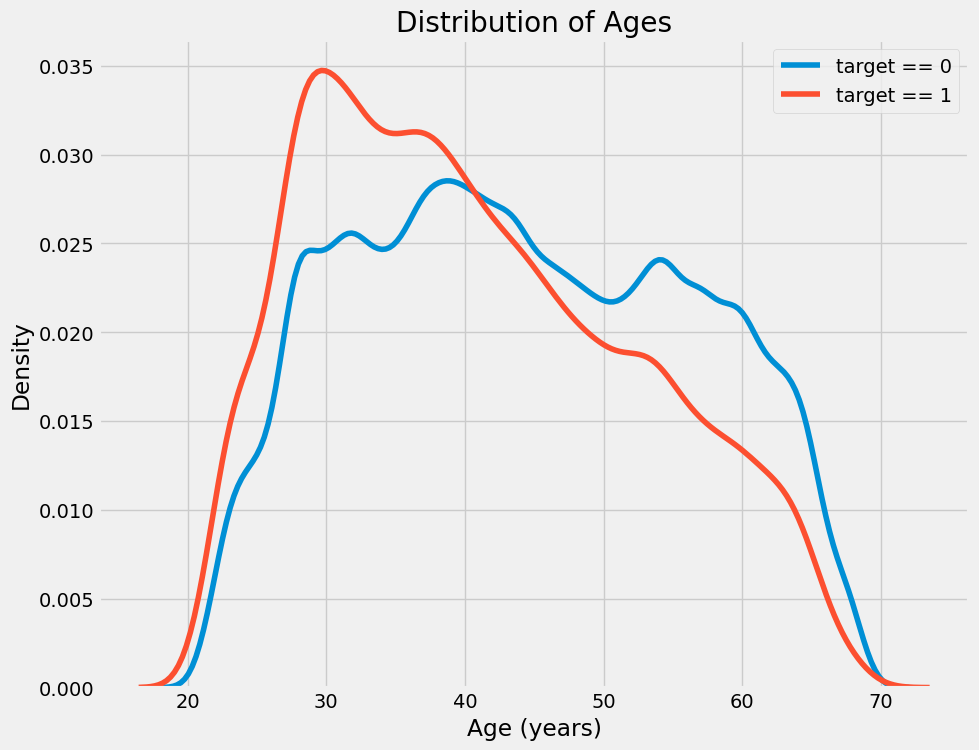

In [65]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0') # Blue curve

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1') # Red curve

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

plt.legend()

The target == 1 curve skews towards the younger end of the range. Although this is not a significant correlation (-0.07 correlation coefficient), this variable is likely going to be useful in a machine learning model because it does affect the target. Let's look at this relationship in another way: average failure to repay loans by age bracket. 

To make this graph, first we `cut` the age category into bins of 5 years each. Then, for each bin, we calculate the average value of the target, which tells us the ratio of loans that were not repaid in each age category.

In [67]:
# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']].copy()
age_data.loc[:, 'YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365
# Bin the age data
age_data.loc[:, 'YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins=np.linspace(20, 70, num=11))
age_data.head(10)

TARGET  DAYS_BIRTH  YEARS_BIRTH  YEARS_BINNED
0       1        9461    25.920548  (25.0, 30.0]
1       0       16765    45.931507  (45.0, 50.0]
2       0       19046    52.180822  (50.0, 55.0]
3       0       19005    52.068493  (50.0, 55.0]
4       0       19932    54.608219  (50.0, 55.0]
5       0       16941    46.413699  (45.0, 50.0]
6       0       13778    37.747945  (35.0, 40.0]
7       0       18850    51.643836  (50.0, 55.0]
8       0       20099    55.065753  (55.0, 60.0]
9       0       14469    39.641096  (35.0, 40.0]

In [68]:
# Group by the bin and calculate averages
age_groups = age_data.groupby('YEARS_BINNED', observed=False).mean()
age_groups

TARGET    DAYS_BIRTH  YEARS_BIRTH
YEARS_BINNED                                     
(20.0, 25.0]  0.123036   8532.795625    23.377522
(25.0, 30.0]  0.111436  10155.219250    27.822518
(30.0, 35.0]  0.102814  11854.848377    32.479037
(35.0, 40.0]  0.089414  13707.908253    37.555913
(40.0, 45.0]  0.078491  15497.661233    42.459346
(45.0, 50.0]  0.074171  17323.900441    47.462741
(50.0, 55.0]  0.066968  19196.494791    52.593136
(55.0, 60.0]  0.055314  20984.262742    57.491131
(60.0, 65.0]  0.052737  22780.547460    62.412459
(65.0, 70.0]  0.037270  24292.614340    66.555108

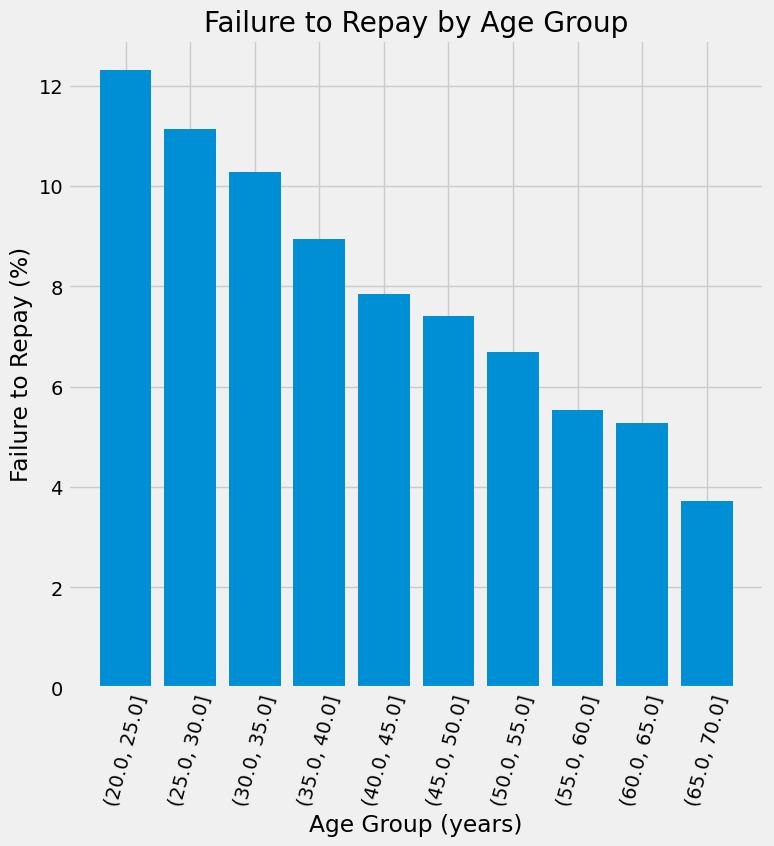

In [69]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

There is a clear trend: younger applicants are more likely to not repay the loan! The rate of failure to repay is above 10% for the youngest three age groups and beolow 5% for the oldest age group.

This is information that could be directly used by the bank: because younger clients are less likely to repay the loan, maybe they should be provided with more guidance or financial planning tips. This does not mean the bank should discriminate against younger clients, but it would be smart to take precautionary measures to help younger clients pay on time.

#### -- Exterior Sources --

The 3 variables with the strongest negative correlations with the target are `EXT_SOURCE_1`, `EXT_SOURCE_2`, and `EXT_SOURCE_3`.
According to the documentation, these features represent a "normalized score from external data source". I'm not sure what this exactly means, but it may be a cumulative sort of credit rating made using numerous sources of data. 

Let's take a look at these variables.

First, we can show the correlations of the `EXT_SOURCE` features with the target and with each other.

In [72]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

TARGET  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  DAYS_BIRTH
TARGET        1.000000     -0.155317     -0.160472     -0.178919   -0.078239
EXT_SOURCE_1 -0.155317      1.000000      0.213982      0.186846    0.600610
EXT_SOURCE_2 -0.160472      0.213982      1.000000      0.109167    0.091996
EXT_SOURCE_3 -0.178919      0.186846      0.109167      1.000000    0.205478
DAYS_BIRTH   -0.078239      0.600610      0.091996      0.205478    1.000000

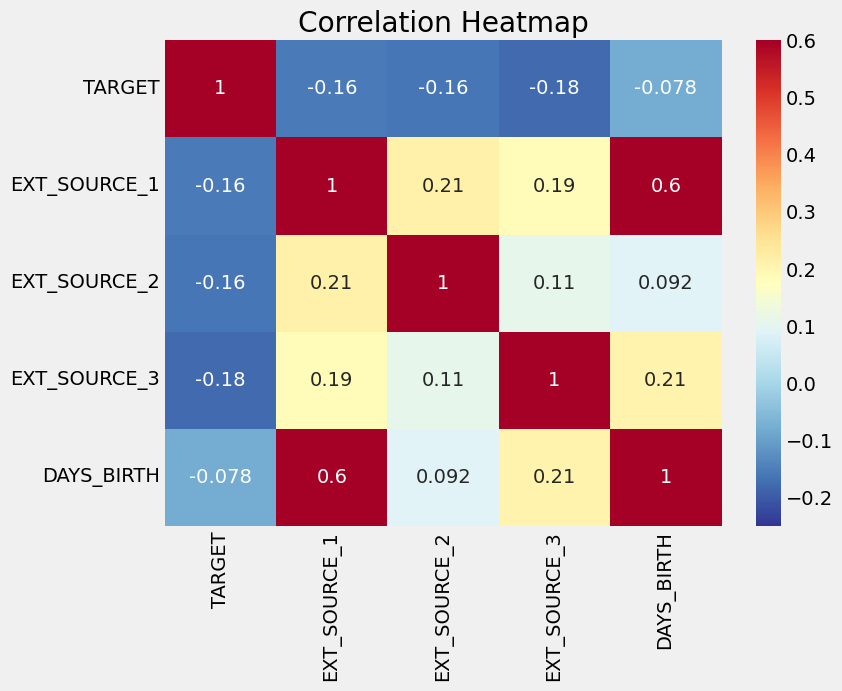

In [73]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

All three `EXT_SOURCE` featureshave negative correlations with the target, indicating that as the value of the `EXT_SOURCE` increases, the client is more likely to repay the loan. We can also see that `DAYS_BIRTH` is positively correlated with `EXT_SOURCE_1` indicating that maybe one of the factors in this score is the client age.

Next we can look at the distribution of each of these features colored by the value of the target. This will let us visualize the effect of this variable on the target.

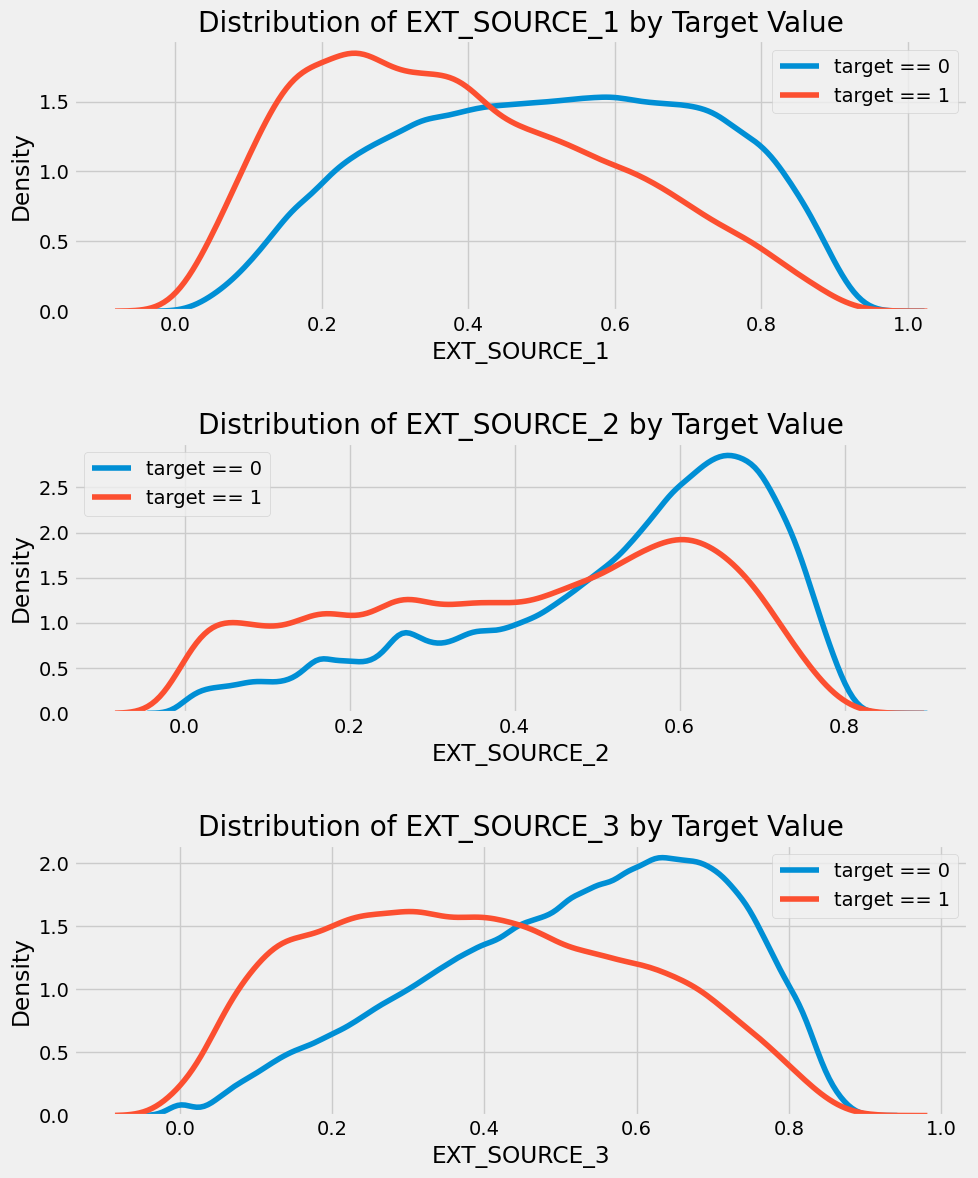

In [75]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');

    plt.legend()
    
plt.tight_layout(h_pad = 2.5)
    

`EXT_SOURCE_3` displays the greatest difference between the values of the target. We can clearly see that this feature has some relationship to the likelihood of an applicant to repay a loan. The relationship is not very strong (in fact they are all [considered very weak](http://www.statstutor.ac.uk/resources/uploaded/pearsons.pdf), but these variables will still be useful for a machine learning model to predict whether or not an applicant will repay a loan on time.

#### -- Pairs Plot --

As a final exploratory plot, we can make a pairs plot of the `EXT_SOURCE` variables and the `DAYS_BIRTH` variable. The [Pairs Plot](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166) is a great exploration tool because it lets us see relationships between multiple pairs of variables as well as distributions of single variables. Here we are using the seaborn visualization library and the PairGrid function to create a Pairs Plot with scatterplots on the upper triangle, histograms on the diagonal, and 2D kernel density plots and correlation coefficients on the lower triangle.

If you don't understand this code, that's all right! Plotting in Python can be overly complex, and for anything beyond the simplest graphs, I usually find an existing implementation and adapt the code (don't repeat yourself)! 

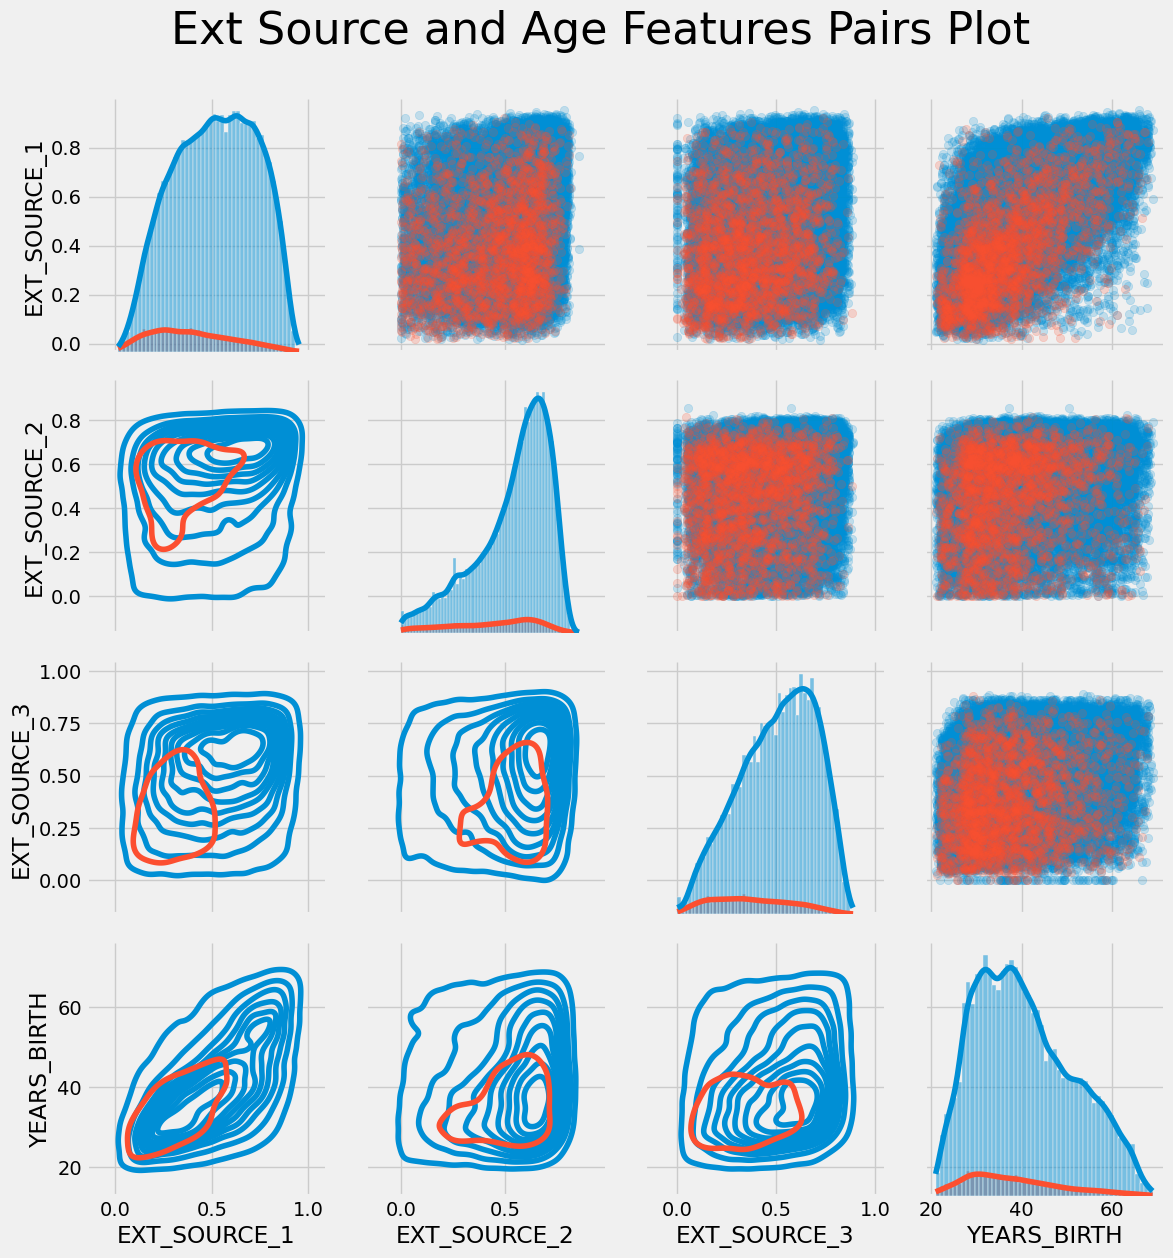

In [78]:
# Copy the data for plotting
plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()

# Add in the age of the client in years
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Drop na values and limit to first 100000 rows
plot_data = plot_data.dropna().loc[:100000, :]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, height = 3, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.histplot, kde=True)

# Bottom is density plot
grid.map_lower(sns.kdeplot)

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05);

In this plot, the red indicates loans that were not repaid and the blue are loans that are paid. We can see the different relationships within the data. There does appear to be a moderate positive linear relationship between the `EXT_SOURCE_1` and the `DAYS_BIRTH` (or equivalently `YEARS_BIRTH`), indicating that this feature may take into account the age of the client. 

### 4. Add variables - Feature Engineering

Feature engineering refers to a geneal process and can involve both feature construction: adding new features from the existing data, and feature selection: choosing only the most important features or other methods of dimensionality reduction. There are many techniques we can use to both create features and select features.

We will do a lot of feature engineering when we start using the other data sources, but in this notebook we will try only two simple feature construction methods: 

* Domain knowledge features

#### -- Domain Knowledge Features --

We can make a couple features that attempt to capture what we think may be important for telling whether a client will default on a loan. Here I'm going to use five features that were inspired by [this script](https://www.kaggle.com/jsaguiar/updated-0-792-lb-lightgbm-with-simple-features) by Aguiar:

* `CREDIT_INCOME_PERCENT`: the percentage of the credit amount relative to a client's income
* `ANNUITY_INCOME_PERCENT`: the percentage of the loan annuity relative to a client's income
* `CREDIT_TERM`:  the length of the payment in months (since the annuity is the monthly amount due
* `DAYS_EMPLOYED_PERCENT`: the percentage of the days employed relative to the client's age


In [82]:
app_train['CREDIT_INCOME_PERCENT'] = app_train['AMT_CREDIT'] / app_train['AMT_INCOME_TOTAL']
app_train['ANNUITY_INCOME_PERCENT'] = app_train['AMT_ANNUITY'] / app_train['AMT_INCOME_TOTAL']
app_train['CREDIT_TERM'] = app_train['AMT_ANNUITY'] / app_train['AMT_CREDIT']
app_train['DAYS_EMPLOYED_PERCENT'] = app_train['DAYS_EMPLOYED'] / app_train['DAYS_BIRTH']

In [83]:
app_test['CREDIT_INCOME_PERCENT'] = app_test['AMT_CREDIT'] / app_test['AMT_INCOME_TOTAL']
app_test['ANNUITY_INCOME_PERCENT'] = app_test['AMT_ANNUITY'] / app_test['AMT_INCOME_TOTAL']
app_test['CREDIT_TERM'] = app_test['AMT_ANNUITY'] / app_test['AMT_CREDIT']
app_test['DAYS_EMPLOYED_PERCENT'] = app_test['DAYS_EMPLOYED'] / app_test['DAYS_BIRTH']

#### -- Visualize New Variables --

We should explore these __domain knowledge__ variables visually in a graph. For all of these, we will make the same KDE plot colored by the value of the `TARGET`.

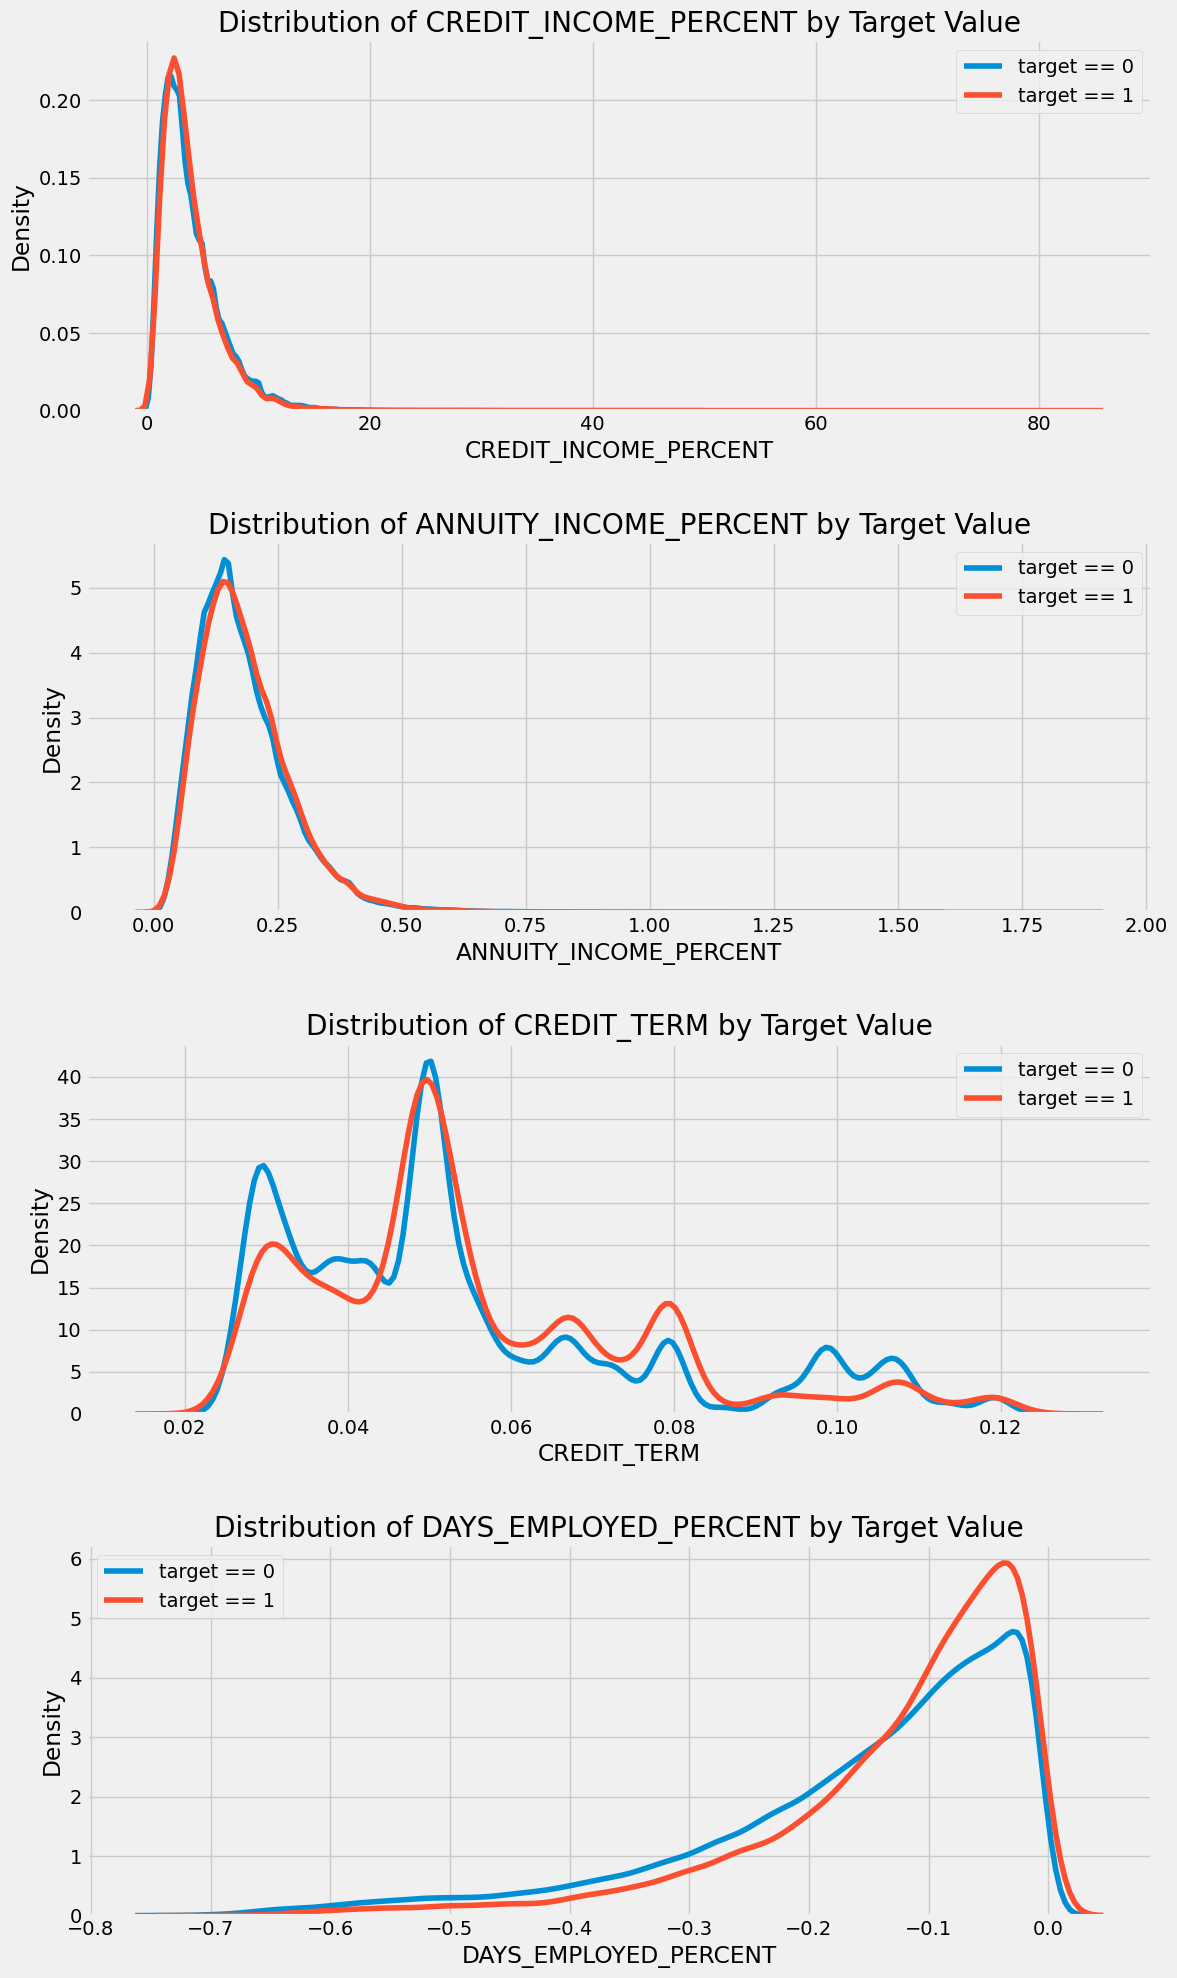

In [85]:
plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    
    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');

    plt.legend()
    
plt.tight_layout(h_pad = 2.5)

It's hard to say ahead of time if these new features will be useful. The only way to tell for sure is to try them out! 

In [87]:
app_train.to_csv('./data/app_train.csv', index = False)
app_test.to_csv('./data/app_test.csv', index = False)

## ETAPE 2 : Ajout des tables 'bureau' et 'bureau_balance'

ETAPE 2
    
    1. Aggrégation des données 
    2. Intégration dans les tables app_train et app_test

Here, we will look at using information from the `bureau` and `bureau_balance` data. The definitions of these data files are:

* bureau: information about client's previous loans with other financial institutions reported to Home Credit. Each previous loan has its own row.
* bureau_balance: monthly information about the previous loans. Each month has its own row.

In [90]:
# Read in the dataframes
# train = pd.read_csv('./data/app_train.csv')
train = app_train
bureau = pd.read_csv('./data/bureau.csv')
bureau_balance = pd.read_csv('./data/bureau_balance.csv')

### 1. Aggrégation des données

#### -- Fonctions communes --

<b> Function to Handle Categorical Variables : </b>
This will take the same form as the agg_numeric function in that it accepts a dataframe and a grouping variable. Then it will calculate the counts and normalized counts of each category for all categorical variables in the dataframe.

In [94]:
def count_categorical(df, group_var, df_name):
    """Computes counts and normalized counts for each observation
    of `group_var` of each unique category in every categorical variable
    
    Parameters
    --------
    df : dataframe 
        The dataframe to calculate the value counts for.
        
    group_var : string
        The variable by which to group the dataframe. For each unique
        value of this variable, the final dataframe will have one row
        
    df_name : string
        Variable added to the front of column names to keep track of columns

    
    Return
    --------
    categorical : dataframe
        A dataframe with counts and normalized counts of each unique category in every categorical variable
        with one row for every unique value of the `group_var`.
        
    """
    
    # Select the categorical columns
    categorical = pd.get_dummies(df.select_dtypes('object'))

    # Make sure to put the identifying id on the column
    categorical[group_var] = df[group_var]

    # Groupby the group var and calculate the sum and mean
    categorical = categorical.groupby(group_var).agg(['sum', 'mean'])
    
    column_names = []
    
    # Iterate through the columns in level 0
    for var in categorical.columns.levels[0]:
        # Iterate through the stats in level 1
        for stat in ['count', 'count_norm']:
            # Make a new column name
            column_names.append('%s_%s_%s' % (df_name, var, stat))
    
    categorical.columns = column_names
    
    return categorical

<b> Function for Numeric Aggregations : </b>
This will allow us to compute aggregate stats for numeric columns across any dataframe. We will re-use this function when we want to apply the same operations for other dataframes.

In [96]:
def agg_numeric(df, group_var, df_name):
    """Aggregates the numeric values in a dataframe. This can
    be used to create features for each instance of the grouping variable.
    
    Parameters
    --------
        df (dataframe): 
            the dataframe to calculate the statistics on
        group_var (string): 
            the variable by which to group df
        df_name (string): 
            the variable used to rename the columns
        
    Return
    --------
        agg (dataframe): 
            a dataframe with the statistics aggregated for 
            all numeric columns. Each instance of the grouping variable will have 
            the statistics (mean, min, max, sum; currently supported) calculated. 
            The columns are also renamed to keep track of features created.
    
    """
    # Remove id variables other than grouping variable
    for col in df:
        if col != group_var and 'SK_ID' in col:
            df = df.drop(columns = col)
            
    group_ids = df[group_var]
    numeric_df = df.select_dtypes('number')
    numeric_df[group_var] = group_ids

    # Group by the specified variable and calculate the statistics
    agg = numeric_df.groupby(group_var).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()

    # Need to create new column names
    columns = [group_var]

    # Iterate through the variables names
    for var in agg.columns.levels[0]:
        # Skip the grouping variable
        if var != group_var:
            # Iterate through the stat names
            for stat in agg.columns.levels[1][:-1]:
                # Make a new column name for the variable and stat
                columns.append('%s_%s_%s' % (df_name, var, stat))

    agg.columns = columns
    return agg

#### -- Aggrégations dans le fichier 'bureau' --

In [98]:
# Counts of bureau dataframe
bureau_counts = count_categorical(bureau, group_var = 'SK_ID_CURR', df_name = 'bureau')
print(bureau_counts.shape)
bureau_counts.head()

(305811, 46)


bureau_CREDIT_ACTIVE_Active_count  \
SK_ID_CURR                                      
100001                                      3   
100002                                      2   
100003                                      1   
100004                                      0   
100005                                      2   

            bureau_CREDIT_ACTIVE_Active_count_norm  \
SK_ID_CURR                                           
100001                                    0.428571   
100002                                    0.250000   
100003                                    0.250000   
100004                                    0.000000   
100005                                    0.666667   

            bureau_CREDIT_ACTIVE_Bad debt_count  \
SK_ID_CURR                                        
100001                                        0   
100002                                        0   
100003                                        0   
100004                                        0   
100005                                        0   

            bureau_CREDIT_ACTIVE_Bad debt_count_norm  \
SK_ID_CURR                                             
100001                                           0.0   
100002                                           0.0   
100003                                           0.0   
100004                                           0.0   
100005                                           0.0   

            bureau_CREDIT_ACTIVE_Closed_count  \
SK_ID_CURR                                      
100001                                      4   
100002                                      6   
100003                                      3   
100004                                      2   
100005                                      1   

            bureau_CREDIT_ACTIVE_Closed_count_norm  \
SK_ID_CURR                                           
100001                                    0.571429   
100002                                    0.750000   
100003                                    0.750000   
100004                                    1.000000   
100005                                    0.333333   

            bureau_CREDIT_ACTIVE_Sold_count  \
SK_ID_CURR                                    
100001                                    0   
100002                                    0   
100003                                    0   
100004                                    0   
100005                                    0   

            bureau_CREDIT_ACTIVE_Sold_count_norm  \
SK_ID_CURR                                         
100001                                       0.0   
100002                                       0.0   
100003                                       0.0   
100004                                       0.0   
100005                                       0.0   

            bureau_CREDIT_CURRENCY_currency 1_count  \
SK_ID_CURR                                            
100001                                            7   
100002                                            8   
100003                                            4   
100004                                            2   
100005                                            3   

            bureau_CREDIT_CURRENCY_currency 1_count_norm  ...  \
SK_ID_CURR                                                ...   
100001                                               1.0  ...   
100002                                               1.0  ...   
100003                                               1.0  ...   
100004                                               1.0  ...   
100005                                               1.0  ...   

            bureau_CREDIT_TYPE_Microloan_count  \
SK_ID_CURR                                       
100001                                       0   
100002                                       0   
100003                                       0   
100004                      

In [99]:
# Aggregated Stats of Bureau Dataframe
bureau_agg = agg_numeric(bureau.drop(columns = ['SK_ID_BUREAU']), group_var = 'SK_ID_CURR', df_name = 'bureau')
print(bureau_agg.shape)
bureau_agg.head()

(305811, 61)


SK_ID_CURR  bureau_DAYS_CREDIT_count  bureau_DAYS_CREDIT_mean  \
0      100001                         7              -735.000000   
1      100002                         8              -874.000000   
2      100003                         4             -1400.750000   
3      100004                         2              -867.000000   
4      100005                         3              -190.666667   

   bureau_DAYS_CREDIT_max  bureau_DAYS_CREDIT_min  bureau_DAYS_CREDIT_sum  \
0                     -49                   -1572                   -5145   
1                    -103                   -1437                   -6992   
2                    -606                   -2586                   -5603   
3                    -408                   -1326                   -1734   
4                     -62                    -373                    -572   

   bureau_CREDIT_DAY_OVERDUE_count  bureau_CREDIT_DAY_OVERDUE_mean  \
0                                7                             0.0   
1                                8                             0.0   
2                                4                             0.0   
3                                2                             0.0   
4                                3                             0.0   

   bureau_CREDIT_DAY_OVERDUE_max  bureau_CREDIT_DAY_OVERDUE_min  ...  \
0                              0                              0  ...   
1                              0                              0  ...   
2                              0                              0  ...   
3                              0                              0  ...   
4                              0                              0  ...   

   bureau_DAYS_CREDIT_UPDATE_count  bureau_DAYS_CREDIT_UPDATE_mean  \
0                                7                      -93.142857   
1                                8                     -499.875000   
2                                4                     -816.000000   
3                                2                     -532.000000   
4                                3                      -54.333333   

   bureau_DAYS_CREDIT_UPDATE_max  bureau_DAYS_CREDIT_UPDATE_min  \
0                             -6                           -155   
1                             -7                          -1185   
2                            -43                          -2131   
3                           -382                           -682   
4                            -11                           -121   

   bureau_DAYS_CREDIT_UPDATE_sum  bureau_AMT_ANNUITY_count  \
0                           -652                         7   
1                          -3999                         7   
2                          -3264                         0   
3                          -1064                         0   
4                           -163                         3   

   bureau_AMT_ANNUITY_mean  bureau_AMT_ANNUITY_max  bureau_AMT_ANNUITY_min  \
0              3545.357143                 10822.5                     0.0   
1                 0.000000                     0.0                     0.0   
2                      NaN                     NaN                     NaN   
3                      NaN                     NaN                     NaN   
4              1420.500000                  4261.5                     0.0   

   bureau_AMT_ANNUITY_sum  
0                 24817.5  
1                     0.0  
2                     0.0  
3                     0.0  
4                  4261.5  

[5 rows x 61 columns]

#### -- Aggrégations dans le fichier 'bureau_balance' --

In [101]:
# Value counts of Bureau Balance dataframe by loan
bureau_balance_counts = count_categorical(bureau_balance, group_var = 'SK_ID_BUREAU', df_name = 'bureau_balance')
print(bureau_balance_counts.shape)
bureau_balance_counts.head()

(817395, 16)


bureau_balance_STATUS_0_count  \
SK_ID_BUREAU                                  
5001709                                   0   
5001710                                   5   
5001711                                   3   
5001712                                  10   
5001713                                   0   

              bureau_balance_STATUS_0_count_norm  \
SK_ID_BUREAU                                       
5001709                                 0.000000   
5001710                                 0.060241   
5001711                                 0.750000   
5001712                                 0.526316   
5001713                                 0.000000   

              bureau_balance_STATUS_1_count  \
SK_ID_BUREAU                                  
5001709                                   0   
5001710                                   0   
5001711                                   0   
5001712                                   0   
5001713                                   0   

              bureau_balance_STATUS_1_count_norm  \
SK_ID_BUREAU                                       
5001709                                      0.0   
5001710                                      0.0   
5001711                                      0.0   
5001712                                      0.0   
5001713                                      0.0   

              bureau_balance_STATUS_2_count  \
SK_ID_BUREAU                                  
5001709                                   0   
5001710                                   0   
5001711                                   0   
5001712                                   0   
5001713                                   0   

              bureau_balance_STATUS_2_count_norm  \
SK_ID_BUREAU                                       
5001709                                      0.0   
5001710                                      0.0   
5001711                                      0.0   
5001712                                      0.0   
5001713                                      0.0   

              bureau_balance_STATUS_3_count  \
SK_ID_BUREAU                                  
5001709                                   0   
5001710                                   0   
5001711                                   0   
5001712                                   0   
5001713                                   0   

              bureau_balance_STATUS_3_count_norm  \
SK_ID_BUREAU                                       
5001709                                      0.0   
5001710                                      0.0   
5001711                                      0.0   
5001712                                      0.0   
5001713                                      0.0   

              bureau_balance_STATUS_4_count  \
SK_ID_BUREAU                                  
5001709                                   0   
5001710                                   0   
5001711                                   0   
5001712                                   0   
5001713                                   0   

              bureau_balance_STATUS_4_count_norm  \
SK_ID_BUREAU                                       
5001709                                      0.0   
5001710                                      0.0   
5001711                                      0.0   
5001712                                      0.0   
5001713                                      0.0   

              bureau_balance_STATUS_5_count  \
SK_ID_BUREAU                                  
5001709                                   0   
5001710                                   0   
5001711                                   0   
5001712                                   0   
5001713                                   0   

              bureau_balance_STATUS_5_count_norm  \
SK_ID_BUREAU                                       
5001709                                      0.0   
5001710                                      0.0   
5

In [102]:
# Aggregated stats of Bureau Balance dataframe by loan
bureau_balance_agg = agg_numeric(bureau_balance, group_var = 'SK_ID_BUREAU', df_name = 'bureau_balance')
print(bureau_balance_agg.shape)
bureau_balance_agg.head()

(817395, 6)


SK_ID_BUREAU  bureau_balance_MONTHS_BALANCE_count  \
0       5001709                                   97   
1       5001710                                   83   
2       5001711                                    4   
3       5001712                                   19   
4       5001713                                   22   

   bureau_balance_MONTHS_BALANCE_mean  bureau_balance_MONTHS_BALANCE_max  \
0                               -48.0                                  0   
1                               -41.0                                  0   
2                                -1.5                                  0   
3                                -9.0                                  0   
4                               -10.5                                  0   

   bureau_balance_MONTHS_BALANCE_min  bureau_balance_MONTHS_BALANCE_sum  
0                                -96                              -4656  
1                                -82                              -3403  
2                                 -3                                 -6  
3                                -18                               -171  
4                                -21                               -231

In [103]:
# Aggregated Stats of Bureau Balance by Client
# Dataframe grouped by the loan
bureau_by_loan = bureau_balance_agg.merge(bureau_balance_counts, right_index = True, left_on = 'SK_ID_BUREAU', how = 'outer')

# Merge to include the SK_ID_CURR
bureau_by_loan = bureau[['SK_ID_BUREAU', 'SK_ID_CURR']].merge(bureau_by_loan, on = 'SK_ID_BUREAU', how = 'left')

# Aggregate the stats for each client
bureau_balance_by_client = agg_numeric(bureau_by_loan.drop(columns = ['SK_ID_BUREAU']), group_var = 'SK_ID_CURR', df_name = 'client')

### 2. Intégration dans les tables app_train et app_test

In [105]:
original_features = list(train.columns)
print('Original Number of Features: ', len(original_features))

Original Number of Features:  258


In [106]:
# Merge with the value counts of bureau
train_bureau = train.merge(bureau_counts, on = 'SK_ID_CURR', how = 'left')

# Merge with the stats of bureau
train_bureau = train_bureau.merge(bureau_agg, on = 'SK_ID_CURR', how = 'left')

# Merge with the monthly information grouped by client
train_bureau = train_bureau.merge(bureau_balance_by_client, on = 'SK_ID_CURR', how = 'left')

In [107]:
new_features = list(train_bureau.columns)
print('Number of features using previous loans from other institutions data: ', len(new_features))

Number of features using previous loans from other institutions data:  469


#### -- Appliquer les mêmes transformations à test_app --

In [109]:
# Read in the test dataframe
# test = pd.read_csv('./data/app_test.csv')
test = app_test

# Merge with the value counts of bureau
test_bureau = test.merge(bureau_counts, on = 'SK_ID_CURR', how = 'left')

# Merge with the stats of bureau
test_bureau = test_bureau.merge(bureau_agg, on = 'SK_ID_CURR', how = 'left')

# Merge with the value counts of bureau balance
test_bureau = test_bureau.merge(bureau_balance_by_client, on = 'SK_ID_CURR', how = 'left')

In [110]:
print('Shape of Testing Data: ', test.shape)
new_features = list(test_bureau.columns)
print('Number of features using previous loans from other institutions data: ', len(new_features))

Shape of Testing Data:  (48744, 257)
Number of features using previous loans from other institutions data:  468


We need to align the testing and training dataframes, which means matching up the columns so they have the exact same columns. This shouldn't be an issue here, but when we one-hot encode variables, we need to align the dataframes to make sure they have the same columns.

In [112]:
train_labels = train_bureau['TARGET']

# Align the dataframes, this will remove the 'TARGET' column
train_bureau, test_bureau = train_bureau.align(test_bureau, join = 'inner', axis = 1)

train_bureau['TARGET'] = train_labels

In [113]:
print('Training Data Shape: ', train_bureau.shape)
print('Testing Data Shape: ', test_bureau.shape)

Training Data Shape:  (307511, 469)
Testing Data Shape:  (48744, 468)


The dataframes now have the same columns (with the exception of the `TARGET` column in the training data). This means we can use them in a machine learning model which needs to see the same columns in both the training and testing dataframes.

In [115]:
train_bureau.to_csv('./data/train_bureau.csv', index = False)
test_bureau.to_csv('./data/test_bureau.csv', index = False)

## ETAPE 3 : Ajout des dernières tables

ETAPE 3
    
    1. Fonctions (aggrégation et plots)
    2. Croisement des fichiers : 'previous_application'
    3. Croisement des fichiers : 'POS_CASH_balance', 'credit_card_balance', 'installments_payments'

We will use the aggregation and value counting functions developed in that notebook in order to incorporate information from the `previous_application`, `POS_CASH_balance`, `installments_payments`, and `credit_card_balance` data files. The definitions of these data files are:

* previous_application (called `previous`): previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* POS_CASH_BALANCE (called `cash`): monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance (called `credit`): monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* installments_payment (called `installments`): payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

In [118]:
# train_bureau = pd.read_csv('./data/train_bureau.csv')
# test_bureau = pd.read_csv('./data/test_bureau.csv')

### 1. Fonctions

Our general approach will be to apply the functions agg_numeric and agg_categorical to the dataframes, grouping by the client id, `SK_ID_CURR`. For the `POS_CASH_balance`, `credit_card_balance`, and `installment_payments`, we can first group by the `SK_ID_PREV`, the unique id for the previous loan. Then we will group the resulting dataframe by the `SK_ID_CURR` to calculate the aggregation statistics for each client across all of their previous loans.

#### -- Function to Calculate Categorical Counts -- 

This function calculates the occurrences (counts) of each category in a categorical variable for each client. It also calculates the normed count, which is the count for a category divided by the total counts for all categories in a categorical variable. 

In [122]:
def agg_categorical(df, parent_var, df_name):
    """
    Aggregates the categorical features in a child dataframe
    for each observation of the parent variable.
    
    Parameters
    --------
    df : dataframe 
        The dataframe to calculate the value counts for.
        
    parent_var : string
        The variable by which to group and aggregate the dataframe. For each unique
        value of this variable, the final dataframe will have one row
        
    df_name : string
        Variable added to the front of column names to keep track of columns

    
    Return
    --------
    categorical : dataframe
        A dataframe with aggregated statistics for each observation of the parent_var
        The columns are also renamed and columns with duplicate values are removed.
        
    """
    
    # Select the categorical columns
    categorical = pd.get_dummies(df.select_dtypes('category'))

    # Make sure to put the identifying id on the column
    categorical[parent_var] = df[parent_var]

    # Groupby the group var and calculate the sum and mean
    categorical = categorical.groupby(parent_var).agg(['sum', 'count', 'mean'])
    
    column_names = []
    
    # Iterate through the columns in level 0
    for var in categorical.columns.levels[0]:
        # Iterate through the stats in level 1
        for stat in ['sum', 'count', 'mean']:
            # Make a new column name
            column_names.append('%s_%s_%s' % (df_name, var, stat))
    
    categorical.columns = column_names
    
    # Remove duplicate columns by values
    _, idx = np.unique(categorical, axis = 1, return_index = True)
    categorical = categorical.iloc[:, idx]
    
    return categorical

#### -- Function for KDE Plots of Variable --

Function that plots the distribution of variable colored by the value of `TARGET` (either 1 for did not repay the loan or 0 for did repay the loan). We can use this function to visually examine any new variables we create. This also calculates the correlation cofficient of the variable with the target which can be used as an approximation of whether or not the created variable will be useful. 

In [124]:
# Plots the disribution of a variable colored by value of the target
def kde_target(var_name, df):
    
    # Calculate the correlation coefficient between the new variable and the target
    corr = df['TARGET'].corr(df[var_name])
    
    # Calculate medians for repaid vs not repaid
    avg_repaid = df.ix[df['TARGET'] == 0, var_name].median()
    avg_not_repaid = df.ix[df['TARGET'] == 1, var_name].median()
    
    plt.figure(figsize = (12, 6))
    
    # Plot the distribution for target == 0 and target == 1
    sns.kdeplot(df.ix[df['TARGET'] == 0, var_name], label = 'TARGET == 0')
    sns.kdeplot(df.ix[df['TARGET'] == 1, var_name], label = 'TARGET == 1')
    
    # label the plot
    plt.xlabel(var_name); plt.ylabel('Density'); plt.title('%s Distribution' % var_name)
    plt.legend();
    
    # print out the correlation
    print('The correlation between %s and the TARGET is %0.4f' % (var_name, corr))
    # Print out average values
    print('Median value for loan that was not repaid = %0.4f' % avg_not_repaid)
    print('Median value for loan that was repaid =     %0.4f' % avg_repaid)

#### -- Function to Convert Data Types --

This will help reduce memory usage by using more efficient types for the variables. For example category is often a better type than object (unless the number of unique categories is close to the number of rows in the dataframe).

In [126]:
import sys

def return_size(df):
    """Return size of dataframe in gigabytes"""
    return round(sys.getsizeof(df) / 1e9, 2)

def convert_types(df, print_info = False):
    
    original_memory = df.memory_usage().sum()
    
    # Iterate through each column
    for c in df:
        
        # Convert ids and booleans to integers
        if ('SK_ID' in c):
            df[c] = df[c].fillna(0).astype(np.int32)
            
        # Convert objects to category
        elif (df[c].dtype == 'object') and (df[c].nunique() < df.shape[0]):
            df[c] = df[c].astype('category')
        
        # Booleans mapped to integers
        elif list(df[c].unique()) == [1, 0]:
            df[c] = df[c].astype(bool)
        
        # Float64 to float32
        elif df[c].dtype == float:
            df[c] = df[c].astype(np.float32)
            
        # Int64 to int32
        elif df[c].dtype == int:
            df[c] = df[c].astype(np.int32)
        
    new_memory = df.memory_usage().sum()
    
    if print_info:
        print(f'Original Memory Usage: {round(original_memory / 1e9, 2)} gb.')
        print(f'New Memory Usage: {round(new_memory / 1e9, 2)} gb.')
        
    return df

### 2. Croisement des fichiers : 'previous_application'

In [128]:
previous = pd.read_csv('./data/previous_application.csv')
previous = convert_types(previous, print_info=True)
previous.head()

Original Memory Usage: 0.49 gb.
New Memory Usage: 0.18 gb.


SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE   AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans   1730.430054          17145.0   
1     2802425      108129         Cash loans  25188.615234         607500.0   
2     2523466      122040         Cash loans  15060.735352         112500.0   
3     2819243      176158         Cash loans  47041.335938         450000.0   
4     1784265      202054         Cash loans  31924.394531         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [129]:
# Calculate aggregate statistics for each numeric column
previous_agg = agg_numeric(previous, 'SK_ID_CURR', 'previous')
print('Previous aggregation shape: ', previous_agg.shape)
previous_agg.head()

Previous aggregation shape:  (338857, 91)


SK_ID_CURR  previous_AMT_ANNUITY_count  previous_AMT_ANNUITY_mean  \
0      100001                           1                3951.000000   
1      100002                           1                9251.775391   
2      100003                           3               56553.988281   
3      100004                           1                5357.250000   
4      100005                           1                4813.200195   

   previous_AMT_ANNUITY_max  previous_AMT_ANNUITY_min  \
0               3951.000000               3951.000000   
1               9251.775391               9251.775391   
2              98356.992188               6737.310059   
3               5357.250000               5357.250000   
4               4813.200195               4813.200195   

   previous_AMT_ANNUITY_sum  previous_AMT_APPLICATION_count  \
0               3951.000000                               1   
1               9251.775391                               1   
2             169661.968750                               3   
3               5357.250000                               1   
4               4813.200195                               2   

   previous_AMT_APPLICATION_mean  previous_AMT_APPLICATION_max  \
0                       24835.50                       24835.5   
1                      179055.00                      179055.0   
2                      435436.50                      900000.0   
3                       24282.00                       24282.0   
4                       22308.75                       44617.5   

   previous_AMT_APPLICATION_min  ...  previous_DAYS_TERMINATION_count  \
0                       24835.5  ...                                1   
1                      179055.0  ...                                1   
2                       68809.5  ...                                3   
3                       24282.0  ...                                1   
4                           0.0  ...                                1   

   previous_DAYS_TERMINATION_mean  previous_DAYS_TERMINATION_max  \
0                    -1612.000000                        -1612.0   
1                      -17.000000                          -17.0   
2                    -1047.333374                         -527.0   
3                     -714.000000                         -714.0   
4                     -460.000000                         -460.0   

   previous_DAYS_TERMINATION_min  previous_DAYS_TERMINATION_sum  \
0                        -1612.0                        -1612.0   
1                          -17.0                          -17.0   
2                        -1976.0                        -3142.0   
3                         -714.0                         -714.0   
4                         -460.0                         -460.0   

   previous_NFLAG_INSURED_ON_APPROVAL_count  \
0                                         1   
1                                         1   
2                                         3   
3                                         1   
4                                         1   

   previous_NFLAG_INSURED_ON_APPROVAL_mean  \
0                                 0.000000   
1                                 0.000000   
2                                 0.666667   
3                                 0.000000   
4                                 0.000000   

   previous_NFLAG_INSURED_ON_APPROVAL_max  \
0                                     0.0   
1                                     0.0   
2                                     1.0   
3                                     0.0   
4                                     0.0   

   previous_NFLAG_INSURED_ON_APPROVAL_min  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   

   previous_NFLAG_INSURED_ON_APPROVAL_sum  
0                                     0.0  
1         

In [130]:
# Calculate value counts for each categorical column
previous_counts = agg_categorical(previous, 'SK_ID_CURR', 'previous')
print('Previous counts shape: ', previous_counts.shape)
previous_counts.head()

Previous counts shape:  (338857, 285)


previous_NAME_GOODS_CATEGORY_Animals_mean  \
SK_ID_CURR                                              
100001                                            0.0   
100002                                            0.0   
100003                                            0.0   
100004                                            0.0   
100005                                            0.0   

            previous_NAME_GOODS_CATEGORY_Animals_sum  \
SK_ID_CURR                                             
100001                                             0   
100002                                             0   
100003                                             0   
100004                                             0   
100005                                             0   

            previous_NAME_GOODS_CATEGORY_House Construction_mean  \
SK_ID_CURR                                                         
100001                                                    0.0      
100002                                                    0.0      
100003                                                    0.0      
100004                                                    0.0      
100005                                                    0.0      

            previous_NAME_GOODS_CATEGORY_House Construction_sum  \
SK_ID_CURR                                                        
100001                                                      0     
100002                                                      0     
100003                                                      0     
100004                                                      0     
100005                                                      0     

            previous_NAME_CASH_LOAN_PURPOSE_Refusal to name the goal_mean  \
SK_ID_CURR                                                                  
100001                                                    0.0               
100002                                                    0.0               
100003                                                    0.0               
100004                                                    0.0               
100005                                                    0.0               

            previous_NAME_CASH_LOAN_PURPOSE_Refusal to name the goal_sum  \
SK_ID_CURR                                                                 
100001                                                      0              
100002                                                      0              
100003                                                      0              
100004                                                      0              
100005                                                      0              

            previous_NAME_CASH_LOAN_PURPOSE_Money for a third person_mean  \
SK_ID_CURR                                                                  
100001                                                    0.0               
100002                                                    0.0               
100003                                                    0.0               
100004                                                    0.0               
100005                                                    0.0               

            previous_NAME_CASH_LOAN_PURPOSE_Money for a third person_sum  \
SK_ID_CURR                                                                 
100001                                                      0              
100002                                                      0              
100003                                                      0              
100004                                                      0              
100005                                                      0              

            previous_NAME_CASH_LOAN_PURPOSE_Hobby_mean  \
SK_ID_CURR                                               
100001    

We can join the calculated dataframe to the main training dataframe using a merge. Then we should delete the calculated dataframes to avoid using too much of the kernel memory.

In [132]:
# train = train_bureau
# train = convert_types(train)
# test = test_bureau
# test = convert_types(test)

# Merge in the previous information
train_prev = train_bureau.merge(previous_counts, on ='SK_ID_CURR', how = 'left')
train_prev = train_prev.merge(previous_agg, on = 'SK_ID_CURR', how = 'left')

test_prev = test_bureau.merge(previous_counts, on ='SK_ID_CURR', how = 'left')
test_prev = test_prev.merge(previous_agg, on = 'SK_ID_CURR', how = 'left')

# Remove variables to free memory
gc.enable()
del previous, previous_agg, previous_counts
gc.collect()

12999

### 3. Croisement des fichiers : 'POS_CASH_balance', 'credit_card_balance', 'installments_payments'

#### -- Function to Aggregate Stats at the Client Level --

In [135]:
def aggregate_client(df, group_vars, df_names):
    """Aggregate a dataframe with data at the loan level 
    at the client level
    
    Args:
        df (dataframe): data at the loan level
        group_vars (list of two strings): grouping variables for the loan 
        and then the client (example ['SK_ID_PREV', 'SK_ID_CURR'])
        names (list of two strings): names to call the resulting columns
        (example ['cash', 'client'])
        
    Returns:
        df_client (dataframe): aggregated numeric stats at the client level. 
        Each client will have a single row with all the numeric data aggregated
    """
    
    # Aggregate the numeric columns
    df_agg = agg_numeric(df, group_var = group_vars[0], df_name = df_names[0])
    
    # If there are categorical variables
    if any(df.dtypes == 'category'):
    
        # Count the categorical columns
        df_counts = agg_categorical(df, parent_var = group_vars[0], df_name = df_names[0])

        # Merge the numeric and categorical
        df_by_loan = df_counts.merge(df_agg, on = group_vars[0], how = 'outer')

        gc.enable()
        del df_agg, df_counts
        gc.collect()

        # Merge to get the client id in dataframe
        df_by_loan = df_by_loan.merge(df[[group_vars[0], group_vars[1]]], on = group_vars[0], how = 'left')

        # Remove the loan id
        df_by_loan = df_by_loan.drop(columns = [group_vars[0]])

        # Aggregate numeric stats by column
        df_by_client = agg_numeric(df_by_loan, group_var = group_vars[1], df_name = df_names[1])

        
    # No categorical variables
    else:
        # Merge to get the client id in dataframe
        df_by_loan = df_agg.merge(df[[group_vars[0], group_vars[1]]], on = group_vars[0], how = 'left')
        
        gc.enable()
        del df_agg
        gc.collect()
        
        # Remove the loan id
        df_by_loan = df_by_loan.drop(columns = [group_vars[0]])
        
        # Aggregate numeric stats by column
        df_by_client = agg_numeric(df_by_loan, group_var = group_vars[1], df_name = df_names[1])
        
    # Memory management
    gc.enable()
    del df, df_by_loan
    gc.collect()

    return df_by_client

#### -- Monthly Cash Data --

In [137]:
cash = pd.read_csv('./data/POS_CASH_balance.csv')
cash = convert_types(cash, print_info=True)
cash.head()

Original Memory Usage: 0.64 gb.
New Memory Usage: 0.41 gb.


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

In [138]:
cash_by_client = aggregate_client(cash, group_vars = ['SK_ID_PREV', 'SK_ID_CURR'], df_names = ['cash', 'client'])
cash_by_client.head()

SK_ID_CURR  client_cash_NAME_CONTRACT_STATUS_XNA_mean_count  \
0      100001                                                9   
1      100002                                               19   
2      100003                                               28   
3      100004                                                4   
4      100005                                               11   

   client_cash_NAME_CONTRACT_STATUS_XNA_mean_mean  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   

   client_cash_NAME_CONTRACT_STATUS_XNA_mean_max  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   

   client_cash_NAME_CONTRACT_STATUS_XNA_mean_min  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   

   client_cash_NAME_CONTRACT_STATUS_XNA_mean_sum  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   

   client_cash_NAME_CONTRACT_STATUS_XNA_sum_count  \
0                                               9   
1                                              19   
2                                              28   
3                                               4   
4                                              11   

   client_cash_NAME_CONTRACT_STATUS_XNA_sum_mean  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   

   client_cash_NAME_CONTRACT_STATUS_XNA_sum_max  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   client_cash_NAME_CONTRACT_STATUS_XNA_sum_min  ...  \
0                                             0  ...   
1                                             0  ...   
2                                             0  ...   
3                                             0  ...   
4                                             0  ...   

   client_cash_SK_DPD_DEF_min_count  client_cash_SK_DPD_DEF_min_mean  \
0                                 9                              0.0   
1                                19                              0.0   
2                                28                              0.0   
3                                 4                              0.0   
4                                11                              0.0   

   client_cash_SK_DPD_DEF_min_max  client_cash_SK_DPD_DEF_min_min  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   client_cash_SK_DPD_DEF_min_sum  client_cash_SK_DPD_DEF_sum_count  \
0                               0                                 9   
1                               0                                19   
2          

In [139]:
print('Cash by Client Shape: ', cash_by_client.shape)
train_all = train_prev.merge(cash_by_client, on = 'SK_ID_CURR', how = 'left')
test_all = test_prev.merge(cash_by_client, on = 'SK_ID_CURR', how = 'left')

gc.enable()
del cash, cash_by_client
gc.collect()

Cash by Client Shape:  (337252, 221)


0

#### -- Monthly Credit Data --

In [141]:
credit = pd.read_csv('./data/credit_card_balance.csv')
credit = convert_types(credit, print_info = True)
credit.head()

Original Memory Usage: 0.71 gb.
New Memory Usage: 0.42 gb.


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE    AMT_BALANCE  \
0     2562384      378907              -6      56.970001   
1     2582071      363914              -1   63975.554688   
2     1740877      371185              -7   31815.224609   
3     1389973      337855              -4  236572.109375   
4     1891521      126868              -1  453919.468750   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0              1700.324951  ...       0.000000              0.000000   
1              2250.000000  ...   64875.554688          64875.554688   
2              2250.000000  ...   31460.085938          31460.085938   
3             11795.759766  ...  233048.968750         233048.968750   
4             22924.890625  ...  453919.468750         453919.468750   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                       1.0                       35.0                Active   
1                       0.0                       69.0                Active   
2                       0.0                       30.0                Active   
3                       0.0                       10.0                Active   
4                       1.0                      101.0                Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0  

[5 rows x 23 columns]

In [142]:
credit_by_client = aggregate_client(credit, group_vars = ['SK_ID_PREV', 'SK_ID_CURR'], df_names = ['credit', 'client'])
credit_by_client.head()

SK_ID_CURR  client_credit_NAME_CONTRACT_STATUS_Approved_mean_count  \
0      100006                                                  6        
1      100011                                                 74        
2      100013                                                 96        
3      100021                                                 17        
4      100023                                                  8        

   client_credit_NAME_CONTRACT_STATUS_Approved_mean_mean  \
0                                                0.0       
1                                                0.0       
2                                                0.0       
3                                                0.0       
4                                                0.0       

   client_credit_NAME_CONTRACT_STATUS_Approved_mean_max  \
0                                                0.0      
1                                                0.0      
2                                                0.0      
3                                                0.0      
4                                                0.0      

   client_credit_NAME_CONTRACT_STATUS_Approved_mean_min  \
0                                                0.0      
1                                                0.0      
2                                                0.0      
3                                                0.0      
4                                                0.0      

   client_credit_NAME_CONTRACT_STATUS_Approved_mean_sum  \
0                                                0.0      
1                                                0.0      
2                                                0.0      
3                                                0.0      
4                                                0.0      

   client_credit_NAME_CONTRACT_STATUS_Approved_sum_count  \
0                                                  6       
1                                                 74       
2                                                 96       
3                                                 17       
4                                                  8       

   client_credit_NAME_CONTRACT_STATUS_Approved_sum_mean  \
0                                                0.0      
1                                                0.0      
2                                                0.0      
3                                                0.0      
4                                                0.0      

   client_credit_NAME_CONTRACT_STATUS_Approved_sum_max  \
0                                                  0     
1                                                  0     
2                                                  0     
3                                                  0     
4                                                  0     

   client_credit_NAME_CONTRACT_STATUS_Approved_sum_min  ...  \
0                                                  0    ...   
1                                                  0    ...   
2                                                  0    ...   
3                                                  0    ...   
4                                                  0    ...   

   client_credit_SK_DPD_DEF_min_count  client_credit_SK_DPD_DEF_min_mean  \
0                                   6                                0.0   
1                                  74                                0.0   
2                                  96                                0.0   
3                                  17                                0.0   
4                                   8                                0.0   

   client_credit_SK_DPD_DEF_min_max  client_credit_SK_DPD_DEF_min_min  \
0                                 0                                 0   
1                                 0                                 0   
2                 

In [143]:
print('Credit by client shape: ', credit_by_client.shape)

train_all = train_all.merge(credit_by_client, on = 'SK_ID_CURR', how = 'left')
test_all = test_all.merge(credit_by_client, on = 'SK_ID_CURR', how = 'left')

gc.enable()
del credit, credit_by_client
gc.collect()

Credit by client shape:  (103558, 576)


0

#### -- Installment Payments --

In [145]:
installments = pd.read_csv('./data/installments_payments.csv')
installments = convert_types(installments, print_info = True)
installments.head()

Original Memory Usage: 0.87 gb.
New Memory Usage: 0.49 gb.


SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT   AMT_PAYMENT  
0          -1180.0             -1187.0     6948.359863   6948.359863  
1          -2156.0             -2156.0     1716.525024   1716.525024  
2            -63.0               -63.0    25425.000000  25425.000000  
3          -2418.0             -2426.0    24350.130859  24350.130859  
4          -1383.0             -1366.0     2165.040039   2160.584961

In [146]:
installments_by_client = aggregate_client(installments, group_vars = ['SK_ID_PREV', 'SK_ID_CURR'], df_names = ['installments', 'client'])
installments_by_client.head()

SK_ID_CURR  client_installments_NUM_INSTALMENT_VERSION_count_count  \
0      100001                                                  7        
1      100002                                                 19        
2      100003                                                 25        
3      100004                                                  3        
4      100005                                                  9        

   client_installments_NUM_INSTALMENT_VERSION_count_mean  \
0                                           3.571429       
1                                          19.000000       
2                                           9.160000       
3                                           3.000000       
4                                           9.000000       

   client_installments_NUM_INSTALMENT_VERSION_count_max  \
0                                                  4      
1                                                 19      
2                                                 12      
3                                                  3      
4                                                  9      

   client_installments_NUM_INSTALMENT_VERSION_count_min  \
0                                                  3      
1                                                 19      
2                                                  6      
3                                                  3      
4                                                  9      

   client_installments_NUM_INSTALMENT_VERSION_count_sum  \
0                                                 25      
1                                                361      
2                                                229      
3                                                  9      
4                                                 81      

   client_installments_NUM_INSTALMENT_VERSION_mean_count  \
0                                                  7       
1                                                 19       
2                                                 25       
3                                                  3       
4                                                  9       

   client_installments_NUM_INSTALMENT_VERSION_mean_mean  \
0                                           1.142857      
1                                           1.052632      
2                                           1.040000      
3                                           1.333333      
4                                           1.111111      

   client_installments_NUM_INSTALMENT_VERSION_mean_max  \
0                                           1.250000     
1                                           1.052632     
2                                           1.142857     
3                                           1.333333     
4                                           1.111111     

   client_installments_NUM_INSTALMENT_VERSION_mean_min  ...  \
0                                           1.000000    ...   
1                                           1.052632    ...   
2                                           1.000000    ...   
3                                           1.333333    ...   
4                                           1.111111    ...   

   client_installments_AMT_PAYMENT_min_count  \
0                                          7   
1                                         19   
2                                         25   
3                                          3   
4                                          9   

   client_installments_AMT_PAYMENT_min_mean  \
0                               3963.824951   
1                               9251.775391   
2                              46164.328125   
3                               5357.250000   
4                               4813.200195   

   client_installments_AMT_PAYMENT_min_max  \
0                              3980.925049   
1                             

In [147]:
print('Installments by client shape: ', installments_by_client.shape)

train_all = train_all.merge(installments_by_client, on = 'SK_ID_CURR', how = 'left')
test_all = test_all.merge(installments_by_client, on = 'SK_ID_CURR', how = 'left')

gc.enable()
del installments, installments_by_client
gc.collect()

Installments by client shape:  (339587, 151)


0

In [148]:
print('Final Training Shape: ', train_all.shape)
print('Final Testing Shape: ', test_all.shape)

Final Training Shape:  (307511, 1789)
Final Testing Shape:  (48744, 1788)


In [149]:
print(f'Final training size: {return_size(train_all)}')
print(f'Final testing size: {return_size(test_all)}')

Final training size: 3.58
Final testing size: 0.57


In [150]:
# Sauvegarde des data set finaux complets
train_all.to_csv('./data/train_all.csv', index = False, chunksize = 500)
test_all.to_csv('./data/test_all.csv', index = False)

## ETAPE 4 : Feature selection, feature engineering

ETAPE 4
    
    1. Missing values
    2. Domain features
    3. Feature selection
    4. Etc.

- Final Training Shape:  (307511, 1785)
- Final Testing Shape:  (48744, 1784)

In [153]:
# train_all = pd.read_csv('./data/train_all.csv')
# test_all = pd.read_csv('./data/test_all.csv')

### 1. Missing values

An important consideration is the missing values in the dataframe. Columns with too many missing values might have to be dropped. 

In [155]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [156]:
def remove_missing_columns(train, test, threshold = 75):
    # Calculate missing stats for train and test (remember to calculate a percent!)
    train_miss = pd.DataFrame(train.isnull().sum())
    train_miss['percent'] = 100 * train_miss[0] / len(train)
    
    test_miss = pd.DataFrame(test.isnull().sum())
    test_miss['percent'] = 100 * test_miss[0] / len(test)
    
    # list of missing columns for train and test
    missing_train_columns = list(train_miss.index[train_miss['percent'] > threshold])
    missing_test_columns = list(test_miss.index[test_miss['percent'] > threshold])
    
    # Combine the two lists together
    missing_columns = list(set(missing_train_columns + missing_test_columns))
    
    # Print information
    print('There are %d columns with greater than %d%% missing values.' % (len(missing_columns), threshold))
    
    # Drop the missing columns and return
    train = train.drop(columns = missing_columns)
    test = test.drop(columns = missing_columns)
    
    return train, test

#### -- Analyse des valeurs manquantes --

In [158]:
missing_train = missing_values_table(train_all)
missing_train.head(10)

Your selected dataframe has 1789 columns.
There are 1596 columns that have missing values.


Missing Values  % of Total Values
previous_RATE_INTEREST_PRIMARY_max                   302902               98.5
previous_RATE_INTEREST_PRIMARY_min                   302902               98.5
previous_RATE_INTEREST_PRIMARY_mean                  302902               98.5
previous_RATE_INTEREST_PRIVILEGED_mean               302902               98.5
previous_RATE_INTEREST_PRIVILEGED_max                302902               98.5
previous_RATE_INTEREST_PRIVILEGED_min                302902               98.5
client_credit_AMT_PAYMENT_CURRENT_mean_mean          246451               80.1
client_credit_AMT_PAYMENT_CURRENT_mean_max           246451               80.1
client_credit_AMT_PAYMENT_CURRENT_max_mean           246451               80.1
client_credit_AMT_PAYMENT_CURRENT_max_max            246451               80.1

In [159]:
variables_high_missing = missing_train[missing_train['% of Total Values'] > 75]
print(variables_high_missing.shape)

(69, 2)


In [160]:
missing_test = missing_values_table(test_all)
missing_test.head(10)

Your selected dataframe has 1788 columns.
There are 1593 columns that have missing values.


Missing Values  \
previous_RATE_INTEREST_PRIMARY_mean                        47632   
previous_RATE_INTEREST_PRIVILEGED_min                      47632   
previous_RATE_INTEREST_PRIMARY_max                         47632   
previous_RATE_INTEREST_PRIMARY_min                         47632   
previous_RATE_INTEREST_PRIVILEGED_mean                     47632   
previous_RATE_INTEREST_PRIVILEGED_max                      47632   
client_credit_AMT_DRAWINGS_ATM_CURRENT_mean_mean           37690   
client_credit_AMT_DRAWINGS_ATM_CURRENT_mean_max            37690   
client_credit_CNT_DRAWINGS_ATM_CURRENT_min_max             37690   
client_credit_CNT_DRAWINGS_ATM_CURRENT_min_mean            37690   

                                                  % of Total Values  
previous_RATE_INTEREST_PRIMARY_mean                            97.7  
previous_RATE_INTEREST_PRIVILEGED_min                          97.7  
previous_RATE_INTEREST_PRIMARY_max                             97.7  
previous_RATE_INTEREST_PRIMARY_min                             97.7  
previous_RATE_INTEREST_PRIVILEGED_mean                         97.7  
previous_RATE_INTEREST_PRIVILEGED_max                          97.7  
client_credit_AMT_DRAWINGS_ATM_CURRENT_mean_mean               77.3  
client_credit_AMT_DRAWINGS_ATM_CURRENT_mean_max                77.3  
client_credit_CNT_DRAWINGS_ATM_CURRENT_min_max                 77.3  
client_credit_CNT_DRAWINGS_ATM_CURRENT_min_mean                77.3

In [161]:
variables_high_missing_test = missing_test[missing_test['% of Total Values'] > 75]
print(variables_high_missing_test.shape)

(69, 2)


#### -- Suppression des colonnes > 75% missing values --

In [163]:
print('train_all shape: ', train_all.shape)
print('test_all shape: ', test_all.shape)
train_all, test_all = remove_missing_columns(train_all, test_all)
print('train_all shape: ', train_all.shape)
print('test_all shape: ', test_all.shape)

train_all shape:  (307511, 1789)
test_all shape:  (48744, 1788)
There are 69 columns with greater than 75% missing values.
train_all shape:  (307511, 1720)
test_all shape:  (48744, 1719)


In [164]:
colonnes = pd.DataFrame(train_all.columns, columns=['Noms des colonnes'])
# Exporter en fichier Excel
colonnes.to_csv('./data/cols.csv', index=False)

### 2. Remove Collinear Variables

Collinear variables are those which are highly correlated with one another. These can decrease the model's availablility to learn, decrease model interpretability, and decrease generalization performance on the test set. Clearly, these are three things we want to increase, so removing collinear variables is a useful step. We will establish an admittedly arbitrary threshold for removing collinear variables, and then remove one out of any pair of variables that is above that threshold. 

The code below identifies the highly correlated variables based on the absolute magnitude of the Pearson correlation coefficient being greater than 0.9. Again, this is not entirely accurate since we are dealing with such a limited section of the data. This code is for illustration purposes, but if we read in the entire dataset, it would work (if the kernels allowed it)! 

This code is adapted from [work by Chris Albon](https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/).

#### -- Identify Correlated Variables --

In [167]:
# Threshold for removing correlated variables
threshold = 0.9

# Absolute value correlation matrix
corr_matrix = train_all.corr().abs()
corr_matrix.head()

SK_ID_CURR  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  \
SK_ID_CURR            1.000000            0.001654      0.001216   
NAME_CONTRACT_TYPE    0.001654            1.000000      0.004022   
FLAG_OWN_CAR          0.001216            0.004022      1.000000   
FLAG_OWN_REALTY       0.000703            0.067177      0.002817   
CNT_CHILDREN          0.001129            0.029998      0.102023   

                    FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
SK_ID_CURR                 0.000703      0.001129          0.001820   
NAME_CONTRACT_TYPE         0.067177      0.029998          0.003531   
FLAG_OWN_CAR               0.002817      0.102023          0.083383   
FLAG_OWN_REALTY            1.000000      0.002366          0.002934   
CNT_CHILDREN               0.002366      1.000000          0.012882   

                    AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
SK_ID_CURR            0.000343     0.000433         0.000232   
NAME_CONTRACT_TYPE    0.221648     0.241544         0.185850   
FLAG_OWN_CAR          0.116225     0.141588         0.120310   
FLAG_OWN_REALTY       0.039270     0.005225         0.045537   
CNT_CHILDREN          0.002145     0.021374         0.001827   

                    REGION_POPULATION_RELATIVE  ...  \
SK_ID_CURR                            0.000849  ...   
NAME_CONTRACT_TYPE                    0.026867  ...   
FLAG_OWN_CAR                          0.041314  ...   
FLAG_OWN_REALTY                       0.015175  ...   
CNT_CHILDREN                          0.025573  ...   

                    client_installments_AMT_PAYMENT_min_count  \
SK_ID_CURR                                           0.002988   
NAME_CONTRACT_TYPE                                   0.104972   
FLAG_OWN_CAR                                         0.007460   
FLAG_OWN_REALTY                                      0.003878   
CNT_CHILDREN                                         0.036925   

                    client_installments_AMT_PAYMENT_min_mean  \
SK_ID_CURR                                          0.000679   
NAME_CONTRACT_TYPE                                  0.021012   
FLAG_OWN_CAR                                        0.028570   
FLAG_OWN_REALTY                                     0.021819   
CNT_CHILDREN                                        0.023666   

                    client_installments_AMT_PAYMENT_min_max  \
SK_ID_CURR                                         0.001181   
NAME_CONTRACT_TYPE                                 0.015769   
FLAG_OWN_CAR                                       0.026083   
FLAG_OWN_REALTY                                    0.015197   
CNT_CHILDREN                                       0.006976   

                    client_installments_AMT_PAYMENT_min_min  \
SK_ID_CURR                                         0.001889   
NAME_CONTRACT_TYPE                                 0.033821   
FLAG_OWN_CAR                                       0.014855   
FLAG_OWN_REALTY                                    0.009710   
CNT_CHILDREN                                       0.013569   

                    client_installments_AMT_PAYMENT_min_sum  \
SK_ID_CURR                                         0.001612   
NAME_CONTRACT_TYPE                                 0.033938   
FLAG_OWN_CAR                                       0.017353   
FLAG_OWN_REALTY                                    0.038956   
CNT_CHILDREN                                       0.058858   

                    client_installments_AMT_PAYMENT_sum_count  \
SK_ID_CURR                                           0.002997   
NAME_CONTRACT_TYPE                                   0.104967   
FLAG_OWN_CAR                                         0.007467   
FLAG_OWN_REALTY                                      0.003890   
CNT_CHILDREN                                         0.036934   

                    client_installments_AMT_PAYMENT_sum_mean  \
SK_ID_CURR                                          0.003315   
NAME_CONTRACT_TYPE                  

In [168]:
# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
upper.head()

SK_ID_CURR  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  \
SK_ID_CURR                 NaN            0.001654      0.001216   
NAME_CONTRACT_TYPE         NaN                 NaN      0.004022   
FLAG_OWN_CAR               NaN                 NaN           NaN   
FLAG_OWN_REALTY            NaN                 NaN           NaN   
CNT_CHILDREN               NaN                 NaN           NaN   

                    FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
SK_ID_CURR                 0.000703      0.001129          0.001820   
NAME_CONTRACT_TYPE         0.067177      0.029998          0.003531   
FLAG_OWN_CAR               0.002817      0.102023          0.083383   
FLAG_OWN_REALTY                 NaN      0.002366          0.002934   
CNT_CHILDREN                    NaN           NaN          0.012882   

                    AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
SK_ID_CURR            0.000343     0.000433         0.000232   
NAME_CONTRACT_TYPE    0.221648     0.241544         0.185850   
FLAG_OWN_CAR          0.116225     0.141588         0.120310   
FLAG_OWN_REALTY       0.039270     0.005225         0.045537   
CNT_CHILDREN          0.002145     0.021374         0.001827   

                    REGION_POPULATION_RELATIVE  ...  \
SK_ID_CURR                            0.000849  ...   
NAME_CONTRACT_TYPE                    0.026867  ...   
FLAG_OWN_CAR                          0.041314  ...   
FLAG_OWN_REALTY                       0.015175  ...   
CNT_CHILDREN                          0.025573  ...   

                    client_installments_AMT_PAYMENT_min_count  \
SK_ID_CURR                                           0.002988   
NAME_CONTRACT_TYPE                                   0.104972   
FLAG_OWN_CAR                                         0.007460   
FLAG_OWN_REALTY                                      0.003878   
CNT_CHILDREN                                         0.036925   

                    client_installments_AMT_PAYMENT_min_mean  \
SK_ID_CURR                                          0.000679   
NAME_CONTRACT_TYPE                                  0.021012   
FLAG_OWN_CAR                                        0.028570   
FLAG_OWN_REALTY                                     0.021819   
CNT_CHILDREN                                        0.023666   

                    client_installments_AMT_PAYMENT_min_max  \
SK_ID_CURR                                         0.001181   
NAME_CONTRACT_TYPE                                 0.015769   
FLAG_OWN_CAR                                       0.026083   
FLAG_OWN_REALTY                                    0.015197   
CNT_CHILDREN                                       0.006976   

                    client_installments_AMT_PAYMENT_min_min  \
SK_ID_CURR                                         0.001889   
NAME_CONTRACT_TYPE                                 0.033821   
FLAG_OWN_CAR                                       0.014855   
FLAG_OWN_REALTY                                    0.009710   
CNT_CHILDREN                                       0.013569   

                    client_installments_AMT_PAYMENT_min_sum  \
SK_ID_CURR                                         0.001612   
NAME_CONTRACT_TYPE                                 0.033938   
FLAG_OWN_CAR                                       0.017353   
FLAG_OWN_REALTY                                    0.038956   
CNT_CHILDREN                                       0.058858   

                    client_installments_AMT_PAYMENT_sum_count  \
SK_ID_CURR                                           0.002997   
NAME_CONTRACT_TYPE                                   0.104967   
FLAG_OWN_CAR                                         0.007467   
FLAG_OWN_REALTY                                      0.003890   
CNT_CHILDREN                                         0.036934   

                    client_installments_AMT_PAYMENT_sum_mean  \
SK_ID_CURR                                          0.003315   
NAME_CONTRACT_TYPE                  

In [169]:
# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove.' % (len(to_drop)))

There are 858 columns to remove.


Applying this on the entire dataset __results in 857  collinear features__ removed.  
This has reduced the number of features singificantly, but it is likely still too many.

#### -- Drop Correlated Variables --

In [172]:
train_all = train_all.drop(columns = to_drop)
test_all = test_all.drop(columns = to_drop)

print('Training shape: ', train_all.shape)
print('Testing shape: ', test_all.shape)

Training shape:  (307511, 862)
Testing shape:  (48744, 861)


In [173]:
# Sauvegarde des data set sans les variables missing values et les var correllées
train_all.to_csv('./data/train_all_859.csv', index = False, chunksize = 500)
test_all.to_csv('./data/test_all_858.csv', index = False)

### 3. Drop Unique values columns

In [175]:
# Chargement des datasets enregistrés précédement
# train_all = pd.read_csv('./data/train_all_859.csv')
# test_all = pd.read_csv('./data/test_all_858.csv')

In [176]:
print('Training shape: ', train_all.shape)
print('Testing shape: ', test_all.shape)

Training shape:  (307511, 862)
Testing shape:  (48744, 861)


In [177]:
# Fonction pour identifier les valeurs unique et les supprimer
def drop_unique_columns(df):
    unique_cols = [col for col in df.columns if df[col].nunique() == 1]
    return df.drop(columns=unique_cols)

In [178]:
# Supprimer les colonnes avec des valeurs uniques
train_all = drop_unique_columns(train_all)
test_all = drop_unique_columns(test_all)
print('Training shape: ', train_all.shape)
print('Testing shape: ', test_all.shape)

Training shape:  (307511, 843)
Testing shape:  (48744, 832)


#### -- Aligning Training and Testing Data --

There need to be the same features (columns) in both the training and testing data. To remove the columns in the training data that are not in the testing data, we need to `align` the dataframes. First we extract the target column from the training data (because this is not in the testing data but we need to keep this information). When we do the align, we must make sure to set `axis = 1` to align the dataframes based on the columns and not on the rows!

In [180]:
train_labels = train_all['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
train_all, test_all = train_all.align(test_all, join = 'inner', axis = 1)

# Add the target back in
train_all['TARGET'] = train_labels

print('Training Features shape: ', train_all.shape)
print('Testing Features shape: ', test_all.shape)

Training Features shape:  (307511, 823)
Testing Features shape:  (48744, 822)


In [181]:
train_all.head()

SK_ID_CURR  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0      100002                   0             0                1   
1      100003                   0             0                0   
2      100004                   1             1                1   
3      100006                   0             0                1   
4      100007                   0             0                1   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0             0          202500.0    406597.5      24700.5   
1             0          270000.0   1293502.5      35698.5   
2             0           67500.0    135000.0       6750.0   
3             0          135000.0    312682.5      29686.5   
4             0          121500.0    513000.0      21865.5   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  ...  \
0                    0.018801        9461  ...   
1                    0.003541       16765  ...   
2                    0.010032       19046  ...   
3                    0.008019       19005  ...   
4                    0.028663       19932  ...   

   client_installments_AMT_INSTALMENT_min_mean  \
0                                  9251.775391   
1                                 46164.328125   
2                                  5357.250000   
3                                 62154.792969   
4                                 12512.815430   

   client_installments_AMT_INSTALMENT_min_max  \
0                                 9251.775391   
1                                98356.992188   
2                                 5357.250000   
3                               691786.875000   
4                                22485.689453   

   client_installments_AMT_INSTALMENT_min_min  \
0                                 9251.775391   
1                                 6662.970215   
2                                 5357.250000   
3                                 2482.919922   
4                                 1821.780029   

   client_installments_AMT_INSTALMENT_min_sum  \
0                                1.757837e+05   
1                                1.154108e+06   
2                                1.607175e+04   
3                                9.944767e+05   
4                                8.258458e+05   

   client_installments_AMT_INSTALMENT_sum_mean  \
0                                219625.703125   
1                                453952.250000   
2                                 21288.464844   
3                                232499.703125   
4                                178659.671875   

   client_installments_AMT_INSTALMENT_sum_max  \
0                                2.196257e+05   
1                                1.150977e+06   
2                                2.128846e+04   
3                                6.917869e+05   
4                                2.946311e+05   

   client_installments_AMT_INSTALMENT_sum_min  \
0                               219625.703125   
1                                80773.382812   
2                                21288.464844   
3                                25091.324219   
4                                18330.390625   

   client_installments_AMT_INSTALMENT_sum_sum  \
0                                4.172888e+06   
1                                1.134881e+07   
2                                6.386539e+04   
3                                3.719995e+06   
4                                1.179154e+07   

   client_installments_AMT_PAYMENT_min_sum  TARGET  
0                             1.757837e+05       1  
1                             1.154108e+06       0  
2                             1.607175e+04       0  
3                             9.944767e+05       0  
4                             4.837564e+05       0  

[5 rows x 823 columns]

In [182]:
missing_values = missing_values_table(train_all)
missing_values.head(20)

Your selected dataframe has 823 columns.
There are 657 columns that have missing values.


Missing Values  \
bureau_AMT_ANNUITY_max                                     227502   
bureau_AMT_ANNUITY_min                                     227502   
bureau_AMT_ANNUITY_mean                                    227502   
client_credit_CNT_DRAWINGS_OTHER_CURRENT_max_sum           220606   
client_credit_CNT_DRAWINGS_OTHER_CURRENT_mean_sum          220606   
client_credit_AMT_DRAWINGS_CURRENT_min_sum                 220606   
client_credit_AMT_DRAWINGS_CURRENT_sum_sum                 220606   
client_credit_AMT_DRAWINGS_OTHER_CURRENT_mean_sum          220606   
client_credit_AMT_DRAWINGS_OTHER_CURRENT_max_sum           220606   
client_credit_AMT_DRAWINGS_OTHER_CURRENT_min_sum           220606   
client_credit_AMT_DRAWINGS_OTHER_CURRENT_sum_sum           220606   
client_credit_AMT_DRAWINGS_POS_CURRENT_mean_sum            220606   
client_credit_AMT_DRAWINGS_POS_CURRENT_max_sum             220606   
client_credit_AMT_DRAWINGS_POS_CURRENT_min_sum             220606   
client_credit_AMT_INST_MIN_REGULARITY_min_mean             220606   
client_credit_AMT_INST_MIN_REGULARITY_min_sum              220606   
client_credit_AMT_PAYMENT_CURRENT_max_sum                  220606   
client_credit_AMT_PAYMENT_CURRENT_min_sum                  220606   
client_credit_AMT_PAYMENT_TOTAL_CURRENT_mean_mean          220606   
client_credit_AMT_PAYMENT_TOTAL_CURRENT_max_mean           220606   

                                                   % of Total Values  
bureau_AMT_ANNUITY_max                                          74.0  
bureau_AMT_ANNUITY_min                                          74.0  
bureau_AMT_ANNUITY_mean                                         74.0  
client_credit_CNT_DRAWINGS_OTHER_CURRENT_max_sum                71.7  
client_credit_CNT_DRAWINGS_OTHER_CURRENT_mean_sum               71.7  
client_credit_AMT_DRAWINGS_CURRENT_min_sum                      71.7  
client_credit_AMT_DRAWINGS_CURRENT_sum_sum                      71.7  
client_credit_AMT_DRAWINGS_OTHER_CURRENT_mean_sum               71.7  
client_credit_AMT_DRAWINGS_OTHER_CURRENT_max_sum                71.7  
client_credit_AMT_DRAWINGS_OTHER_CURRENT_min_sum                71.7  
client_credit_AMT_DRAWINGS_OTHER_CURRENT_sum_sum                71.7  
client_credit_AMT_DRAWINGS_POS_CURRENT_mean_sum                 71.7  
client_credit_AMT_DRAWINGS_POS_CURRENT_max_sum                  71.7  
client_credit_AMT_DRAWINGS_POS_CURRENT_min_sum                  71.7  
client_credit_AMT_INST_MIN_REGULARITY_min_mean                  71.7  
client_credit_AMT_INST_MIN_REGULARITY_min_sum                   71.7  
client_credit_AMT_PAYMENT_CURRENT_max_sum                       71.7  
client_credit_AMT_PAYMENT_CURRENT_min_sum                       71.7  
client_credit_AMT_PAYMENT_TOTAL_CURRENT_mean_mean               71.7  
client_credit_AMT_PAYMENT_TOTAL_CURRENT_max_mean                71.7

### 4. PCA to reduce dimension

In [184]:
# PCA sur les variables pour estimer la part d'information capturé avec XX variables

In [185]:
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Make sure to drop the ids and target
train = train_all.drop(columns = ['SK_ID_CURR', 'TARGET'])
test = test_all.drop(columns = ['SK_ID_CURR'])

# Make a pipeline with StandardScaler, imputation and pca
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),  # Ajouter StandardScaler pour centrer et réduire les données
    #('pca', PCA(n_components=0.99))]) # Spécifier le nombre de composants principaux
    ('pca', PCA())
])

# Fit and transform on the training data
train_pca = pipeline.fit_transform(train)

# transform the testing data
# test_pca = pipeline.transform(test)

In [186]:
print("Dimensions dataset avant réduction PCA : ", train.shape)
print("Dimensions dataset après réduction PCA : ", train_pca.shape)

Dimensions dataset avant réduction PCA :  (307511, 821)
Dimensions dataset après réduction PCA :  (307511, 821)


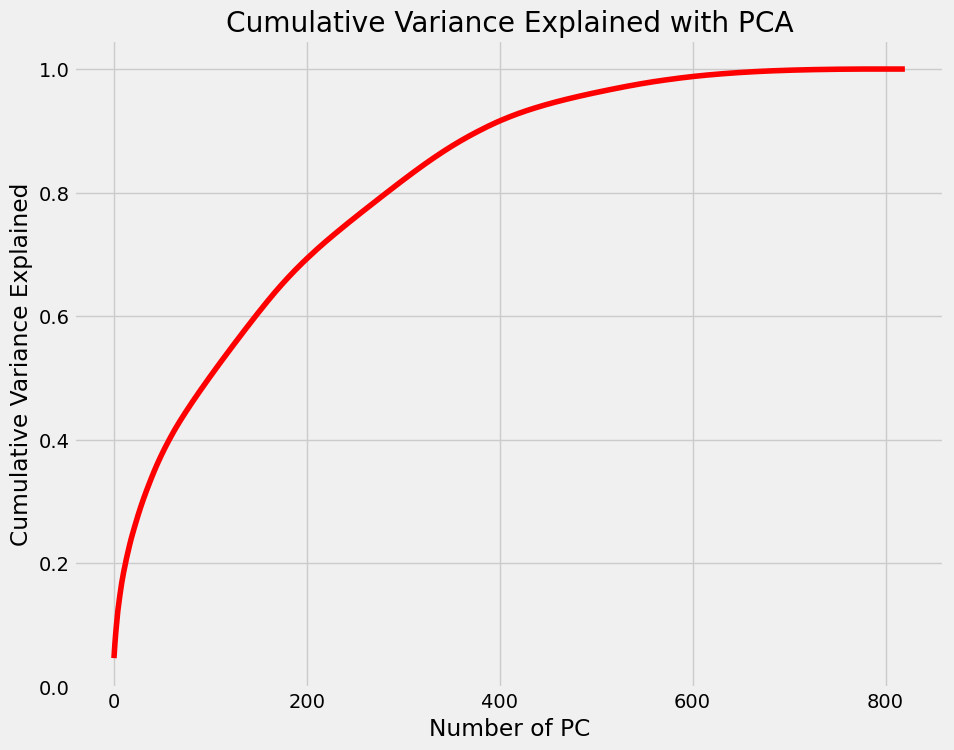

In [187]:
# Extract the pca object
pca = pipeline.named_steps['pca']

plt.figure(figsize = (10, 8))
plt.plot(list(range(train.shape[1])), np.cumsum(pca.explained_variance_ratio_), 'r-')
plt.xlabel('Number of PC'); plt.ylabel('Cumulative Variance Explained');
plt.title('Cumulative Variance Explained with PCA');

Pour capturer 80% de la variance des données, il faut un peu moins de 300 variables, cela nous donne une indication du nombre de variables à intégrer dans le modèle.

### 5. Feature Selection through Feature Importances

The next method we can employ for feature selection is to use the feature importances of a model. Tree-based models (and consequently ensembles of trees) can determine an "importance" for each feature by measuring the reduction in impurity for including the feature in the model. The relative value of the importances can be used as an approximation of the "relevance" of different features in a model. Moreover, we can use the feature importances to remove features that the model does not consider important. 

One method for doing this automatically is the [Recursive Feature Elimination method](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html) in Scikit-Learn. This accepts an estimator (one that either returns feature weights such as a linear regression, or feature importances such as a random forest) and a desired number of features. In then fits the model repeatedly on the data and iteratively removes the lowest importance features until the desired number of features is left. This means we have another arbitrary hyperparameter to use in out pipeline: the number of features to keep! 

Instead of doing this automatically, we can perform our own feature removal by first removing all zero importance features from the model. If this leaves too many features, then we can consider removing the features with the lowest importance. We will use a Gradient Boosted Model from the LightGBM library to assess feature importances. If you're used to the Scikit-Learn library, the LightGBM library has an API that makes deploying the model very similar to using a Scikit-Learn model. 

Since the LightGBM model does not need missing values to be imputed, we can directly `fit` on the training data. We will use Early Stopping to determine the optimal number of iterations and run the model twice, averaging the feature importances to try and avoid overfitting to a certain set of features.

In [32]:
# Chargement des datasets enregistrés précédement
train_all = pd.read_csv('./data/train_all_859.csv')
test_all = pd.read_csv('./data/test_all_858.csv')

In [34]:
train = train_all.drop(columns = ['SK_ID_CURR'])

In [39]:
# Créer un StandardScaler pour centrer et réduire les données
scaler = StandardScaler()

In [41]:
# On va déterminer les features importance sur un échantillon des données pour accélerer le processus
sample_size = 10000
# Utiliser train_test_split pour obtenir un échantillon stratifié
train_sample, _ = train_test_split(train, test_size=(len(train) - sample_size) / len(train), stratify=train['TARGET'], random_state=1002)

In [43]:
# Initialize an empty array to hold feature importances
feature_importances = np.zeros(train_sample.shape[1]-1)

# Create the model with several hyperparameters
model = lgb.LGBMClassifier(objective='binary', boosting_type='goss', n_estimators=10000, class_weight='balanced')

In [45]:
# Boucle d'entraînement
for i in range(2):
    # Diviser les données en ensembles d'entraînement et de validation
    train_features, valid_features, train_y, valid_y = train_test_split(
        train_sample.loc[:, train_sample.columns != 'TARGET'], 
        train_sample['TARGET'], 
        test_size=0.25, 
        random_state=i
    )
    
    # Centrer et réduire les caractéristiques
    train_features = scaler.fit_transform(train_features)
    valid_features = scaler.transform(valid_features)
    
    # Entraîner le modèle
    model.fit(
        train_features, train_y, 
        # early_stopping_rounds=100, 
        eval_set=[(valid_features, valid_y)], 
        eval_metric='auc' 
        # verbose=200
    )
    
    # Enregistrer les importances des caractéristiques
    feature_importances += model.feature_importances_

C:\Users\druar\anaconda3\envs\Formation_P7\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\druar\anaconda3\envs\Formation_P7\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 612, number of negative: 6888
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.081455 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 57830
[LightGBM] [Info] Number of data points in the train set: 7500, number of used features: 809
[LightGBM] [Info] Using GOSS
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_samp

In [46]:
# Make sure to average feature importances! 
df_features = train_sample.loc[:, train_sample.columns != 'TARGET']
feature_importances = feature_importances / 2
feature_importances = pd.DataFrame({'feature': list(df_features.columns), 'importance': feature_importances}).sort_values('importance', ascending = False)

feature_importances.head()

feature  importance
9             DAYS_EMPLOYED       739.5
29             EXT_SOURCE_2       630.0
30             EXT_SOURCE_3       607.0
211  ANNUITY_INCOME_PERCENT       534.0
8                DAYS_BIRTH       513.0

In [399]:
# Find the features with zero importance
zero_features = list(feature_importances[feature_importances['importance'] == 0.0]['feature'])
print('There are %d features with 0.0 importance' % len(zero_features))
feature_importances.tail()

There are 298 features with 0.0 importance


feature  importance
479  previous_NAME_GOODS_CATEGORY_Photo / Cinema Eq...         0.0
300      client_bureau_balance_STATUS_2_count_norm_max         0.0
301      client_bureau_balance_STATUS_2_count_norm_min         0.0
302      client_bureau_balance_STATUS_2_count_norm_sum         0.0
410          previous_NAME_GOODS_CATEGORY_Jewelry_mean         0.0

In [65]:
def plot_feature_importances(df, threshold = 0.9):
    """
    Plots 15 most important features and the cumulative importance of features.
    Prints the number of features needed to reach threshold cumulative importance.
    
    Parameters
    --------
    df : dataframe
        Dataframe of feature importances. Columns must be feature and importance
    threshold : float, default = 0.9
        Threshold for prining information about cumulative importances
        
    Return
    --------
    df : dataframe
        Dataframe ordered by feature importances with a normalized column (sums to 1)
        and a cumulative importance column
    
    """
    
    plt.rcParams['font.size'] = 18
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    # Cumulative importance plot
    plt.figure(figsize = (8, 6))
    plt.plot(list(range(len(df))), df['cumulative_importance'], 'r-')
    plt.xlabel('Number of Features'); plt.ylabel('Cumulative Importance'); 
    plt.title('Cumulative Feature Importance');
    plt.show();
    
    importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
    print('%d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold))
    
    return df

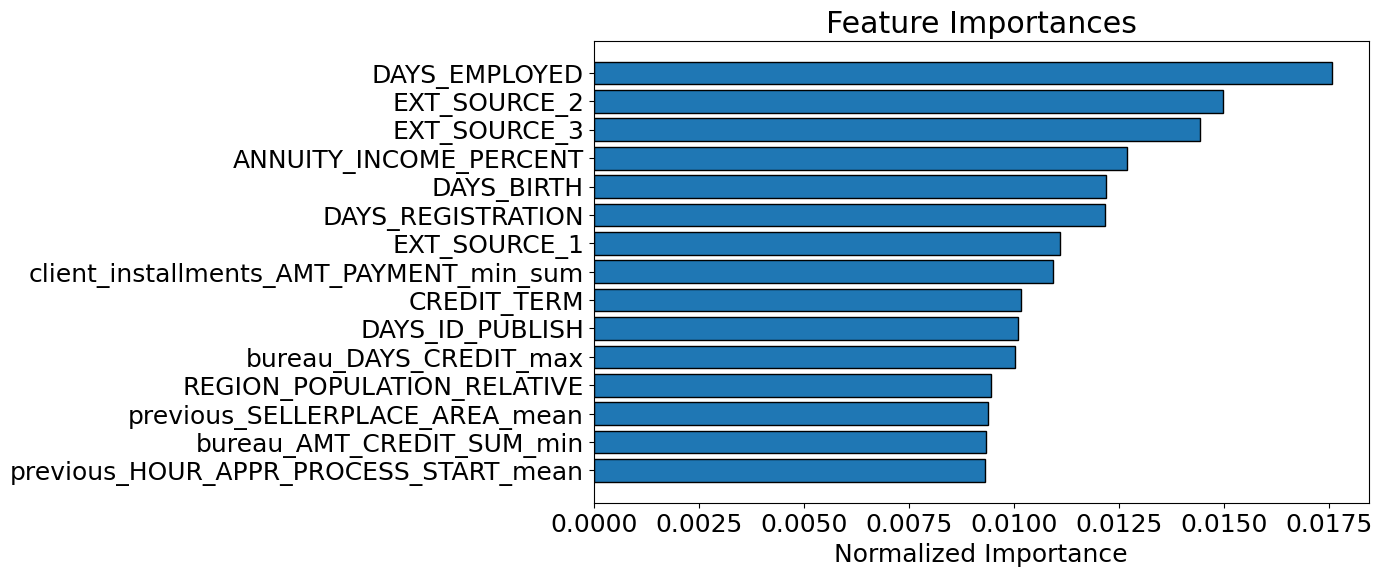

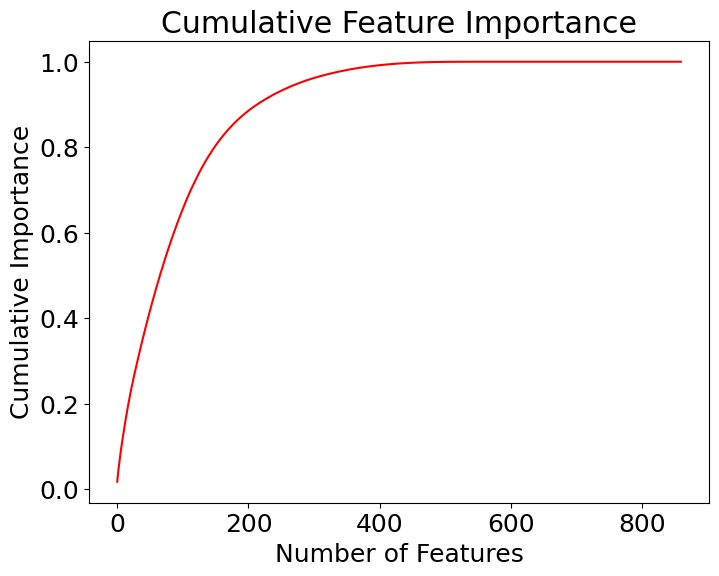

215 features required for 0.90 of cumulative importance


In [67]:
norm_feature_importances = plot_feature_importances(feature_importances)

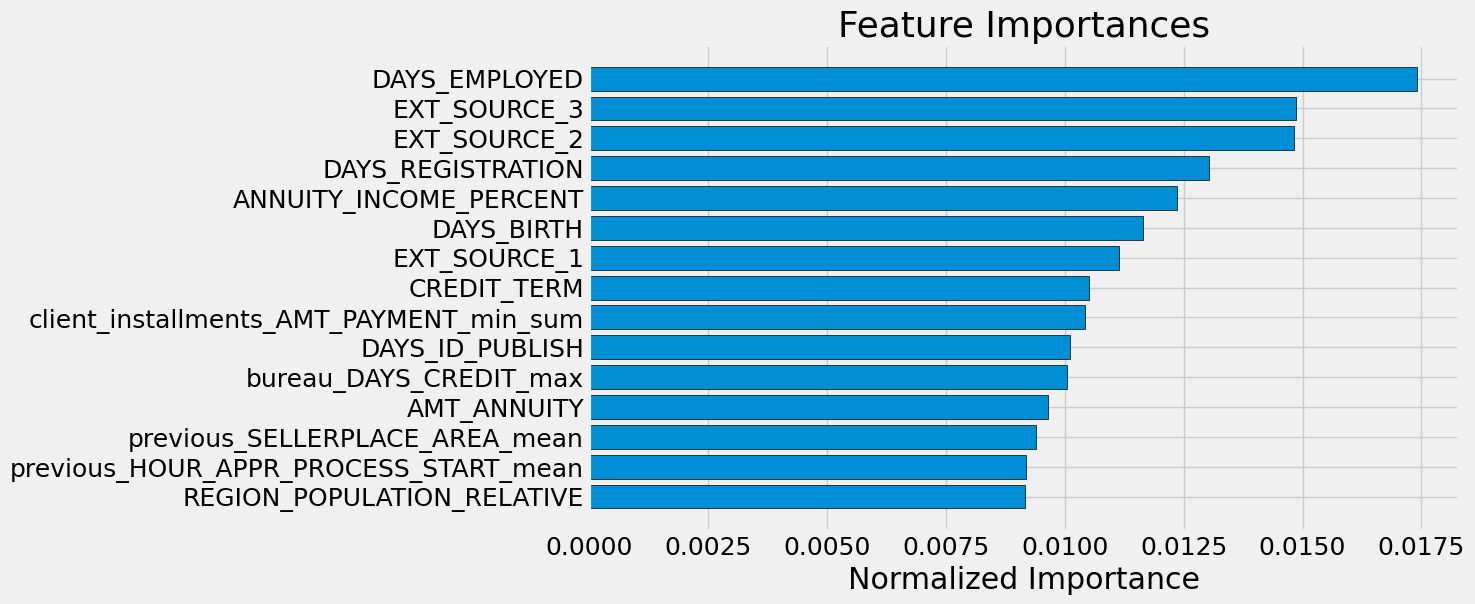

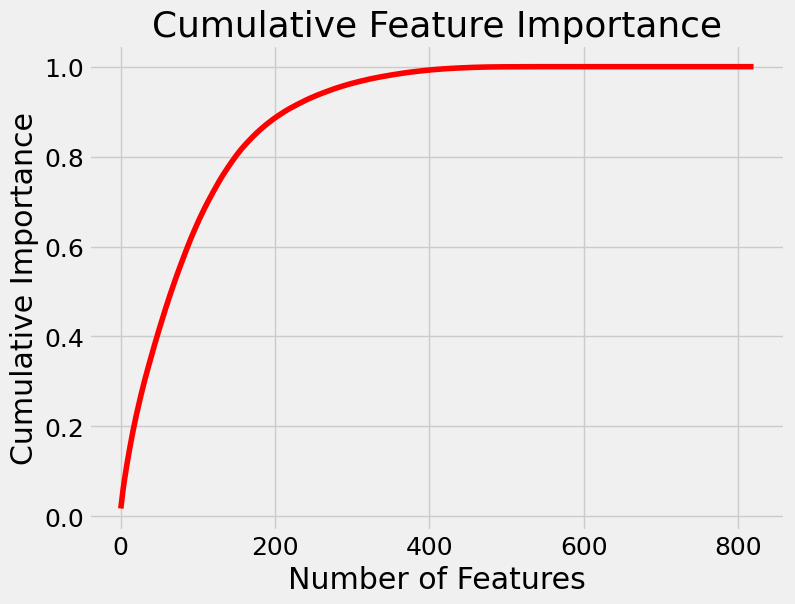

277 features required for 0.95 of cumulative importance


In [405]:
norm_feature_importances = plot_feature_importances(feature_importances, threshold = 0.95)

We can keep only the features needed for 95% importance. This step seems to me to have the greatest chance of harming the model's learning ability, so rather than changing the original dataset, we will make smaller copies. Then, we can test both versions of the data to see if the extra feature removal step is worthwhile. 

In [415]:
# Threshold for cumulative importance
threshold = 0.95

# Extract the features to keep
features_to_keep = list(norm_feature_importances[norm_feature_importances['cumulative_importance'] < threshold]['feature'])

# Create new datasets with smaller features
features_to_keep.append('SK_ID_CURR')
test_small = test_all[features_to_keep]
features_to_keep.append('TARGET')
train_small = train_all[features_to_keep]

In [417]:
print("Dimensions dataset train après réduction feature importance : ", train_small.shape)
print("Dimensions dataset test après réduction feature importance : ", test_small.shape)

Dimensions dataset train après réduction feature importance :  (307511, 278)
Dimensions dataset test après réduction feature importance :  (48744, 277)


In [419]:
# Sauvegarde des data set
train_small.to_csv('./data/train_small.csv', index = False)
test_small.to_csv('./data/test_small.csv', index = False)

#### -- Analyse des valeurs manquantes sur les variables finales --

In [4]:
train_small = pd.read_csv('./data/train_small.csv')
test_small = pd.read_csv('./data/test_small.csv')

In [16]:
missing_values = missing_values_table(train_small)
# Exporter en fichier Excel
missing_values.to_csv('./data/missing_values.csv')
missing_values.head(20)

Your selected dataframe has 278 columns.
There are 257 columns that have missing values.


Missing Values  \
bureau_AMT_ANNUITY_max                                     227502   
bureau_AMT_ANNUITY_min                                     227502   
bureau_AMT_ANNUITY_mean                                    227502   
client_credit_AMT_CREDIT_LIMIT_ACTUAL_mean_mean            220606   
client_credit_AMT_CREDIT_LIMIT_ACTUAL_sum_sum              220606   
client_credit_AMT_BALANCE_max_mean                         220606   
client_credit_CNT_DRAWINGS_CURRENT_mean_mean               220606   
client_credit_CNT_DRAWINGS_CURRENT_max_mean                220606   
client_credit_AMT_PAYMENT_TOTAL_CURRENT_max_mean           220606   
client_credit_CNT_DRAWINGS_ATM_CURRENT_mean_sum            220606   
client_credit_AMT_CREDIT_LIMIT_ACTUAL_min_sum              220606   
client_credit_AMT_CREDIT_LIMIT_ACTUAL_mean_sum             220606   
client_credit_AMT_DRAWINGS_ATM_CURRENT_max_sum             220606   
client_credit_AMT_CREDIT_LIMIT_ACTUAL_max_sum              220606   
client_credit_AMT_DRAWINGS_ATM_CURRENT_mean_sum            220606   
client_credit_AMT_BALANCE_mean_mean                        220606   
client_credit_AMT_PAYMENT_TOTAL_CURRENT_mean_mean          220606   
client_bureau_balance_STATUS_X_count_norm_mean             215280   
client_bureau_balance_MONTHS_BALANCE_count_min             215280   
client_bureau_balance_STATUS_C_count_norm_mean             215280   

                                                   % of Total Values  
bureau_AMT_ANNUITY_max                                          74.0  
bureau_AMT_ANNUITY_min                                          74.0  
bureau_AMT_ANNUITY_mean                                         74.0  
client_credit_AMT_CREDIT_LIMIT_ACTUAL_mean_mean                 71.7  
client_credit_AMT_CREDIT_LIMIT_ACTUAL_sum_sum                   71.7  
client_credit_AMT_BALANCE_max_mean                              71.7  
client_credit_CNT_DRAWINGS_CURRENT_mean_mean                    71.7  
client_credit_CNT_DRAWINGS_CURRENT_max_mean                     71.7  
client_credit_AMT_PAYMENT_TOTAL_CURRENT_max_mean                71.7  
client_credit_CNT_DRAWINGS_ATM_CURRENT_mean_sum                 71.7  
client_credit_AMT_CREDIT_LIMIT_ACTUAL_min_sum                   71.7  
client_credit_AMT_CREDIT_LIMIT_ACTUAL_mean_sum                  71.7  
client_credit_AMT_DRAWINGS_ATM_CURRENT_max_sum                  71.7  
client_credit_AMT_CREDIT_LIMIT_ACTUAL_max_sum                   71.7  
client_credit_AMT_DRAWINGS_ATM_CURRENT_mean_sum                 71.7  
client_credit_AMT_BALANCE_mean_mean                             71.7  
client_credit_AMT_PAYMENT_TOTAL_CURRENT_mean_mean               71.7  
client_bureau_balance_STATUS_X_count_norm_mean                  70.0  
client_bureau_balance_MONTHS_BALANCE_count_min                  70.0  
client_bureau_balance_STATUS_C_count_norm_mean                  70.0

In [92]:
var_sup_10p_missing_values = missing_values[missing_values['% of Total Values'] > 10].index.tolist()

In [94]:
len(var_sup_10p_missing_values)

94

In [110]:
# Récupérer les features importance des variables ayant plus de 10% de valeurs manquantes
filtered_features = norm_feature_importances[norm_feature_importances['feature'].isin(var_sup_10p_missing_values)]
# Filtrer sur les variables avec une feature importance élevée 
filtered_features = filtered_features[filtered_features['importance'] > 300]
filtered_features.shape

(8, 5)

In [112]:
features_knn = filtered_features[filtered_features['importance'] > 300]['feature'].tolist()
features_knn

['DAYS_EMPLOYED',
 'EXT_SOURCE_3',
 'EXT_SOURCE_1',
 'bureau_DAYS_CREDIT_max',
 'bureau_AMT_CREDIT_SUM_min',
 'bureau_DAYS_ENDDATE_FACT_max',
 'bureau_AMT_CREDIT_SUM_DEBT_mean',
 'bureau_AMT_CREDIT_SUM_mean']

#### -- Remplacement des valeurs manquantes par KNN --

In [ ]:
# Copie du df d'origine : 
train_small_completed = train_small.copy()

# Remplacement des valeurs manquantes des variables avec moins de 10% de valeurs manquantes par la valeur médiane :
# sante_publique_pays_completed[list_var_inf10p].fillna(sante_publique_pays_completed[list_var_inf10p].median(), inplace=True)

# Remplacement des valeurs manquantes des variables avec plus de 10% de valeurs manquantes et une feature importance élevée = 8 variables
# Sélectionner les colonnes à utiliser pour l'imputation
# Préter attention à bien remplacer les valeurs manquantes avec les autres méthodes avant, sinon KNN s'applique sur toutes les valeurs manquantes
data_to_impute = train_small_completed[features_knn]
# Sauvegarder les index
index_data_to_impute = data_to_impute.index
# Instancier KNNImputer :
imputer = KNNImputer(missing_values=np.nan, n_neighbors=5, weights="uniform")
# Possibilité d'ajouter l'option add_indicator=True pour tracer les valeurs remplacées
# Imputer les valeurs manquantes et convertir le résultat en DataFrame pandas
data_imputed = pd.DataFrame(imputer.fit_transform(data_to_impute), index=index_data_to_impute, columns=data_to_impute.columns)
# Réintégrer les valeurs imputées dans le DataFrame d'origine
# sante_publique_pays_completed[data_imputed.columns] = data_imputed

#### -- Extract dataset ultra light --

In [6]:
train_small = pd.read_csv('./data/train_small.csv')
test_small = pd.read_csv('./data/test_small.csv')

In [8]:
train = train_small.drop(columns = ['SK_ID_CURR'])

In [12]:
# Créer un StandardScaler pour centrer et réduire les données
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [14]:
# On va déterminer les features importance sur un échantillon des données pour accélerer le processus
sample_size = 10000
# Utiliser train_test_split pour obtenir un échantillon stratifié
train_sample, _ = train_test_split(train, test_size=(len(train) - sample_size) / len(train), stratify=train['TARGET'], random_state=1002)

In [16]:
# Initialize an empty array to hold feature importances
feature_importances = np.zeros(train_sample.shape[1]-1)

# Create the model with several hyperparameters
model = lgb.LGBMClassifier(objective='binary', boosting_type='goss', n_estimators=10000, class_weight='balanced')

In [18]:
# Boucle d'entraînement
for i in range(2):
    # Diviser les données en ensembles d'entraînement et de validation
    train_features, valid_features, train_y, valid_y = train_test_split(
        train_sample.loc[:, train_sample.columns != 'TARGET'], 
        train_sample['TARGET'], 
        test_size=0.25, 
        random_state=i
    )
    
    # Centrer et réduire les caractéristiques
    train_features = scaler.fit_transform(train_features)
    valid_features = scaler.transform(valid_features)
    
    # Entraîner le modèle
    model.fit(
        train_features, train_y, 
        # early_stopping_rounds=100, 
        eval_set=[(valid_features, valid_y)], 
        eval_metric='auc' 
        # verbose=200
    )
    
    # Enregistrer les importances des caractéristiques
    feature_importances += model.feature_importances_

C:\Users\druar\anaconda3\envs\Formation_P7\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\druar\anaconda3\envs\Formation_P7\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 612, number of negative: 6888
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008338 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 44753
[LightGBM] [Info] Number of data points in the train set: 7500, number of used features: 276
[LightGBM] [Info] Using GOSS
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_samp

In [22]:
# Make sure to average feature importances! 
df_features = train_sample.loc[:, train_sample.columns != 'TARGET']
feature_importances = feature_importances / 2
feature_importances = pd.DataFrame({'feature': list(df_features.columns), 'importance': feature_importances}).sort_values('importance', ascending = False)

feature_importances.head()

feature  importance
0           DAYS_EMPLOYED       794.0
2            EXT_SOURCE_2       645.5
1            EXT_SOURCE_3       636.5
4  ANNUITY_INCOME_PERCENT       567.0
3       DAYS_REGISTRATION       554.5

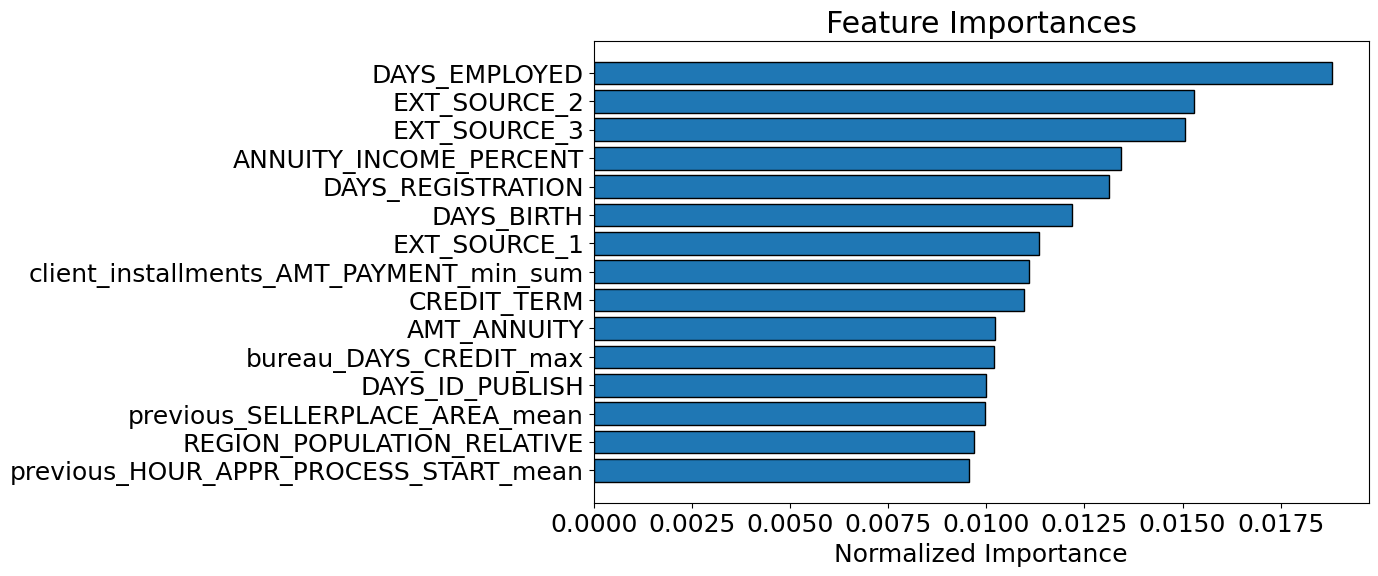

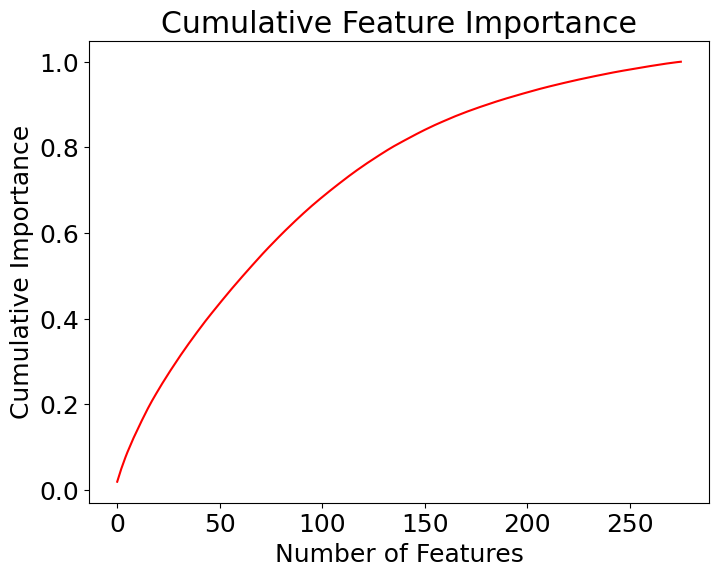

182 features required for 0.90 of cumulative importance


In [24]:
norm_feature_importances = plot_feature_importances(feature_importances)

In [26]:
# Threshold for cumulative importance
threshold = 0.30

# Extract the features to keep
features_to_keep = list(norm_feature_importances[norm_feature_importances['cumulative_importance'] < threshold]['feature'])

# Create new datasets with smaller features
features_to_keep.append('SK_ID_CURR')
test_light = test_small[features_to_keep]
features_to_keep.append('TARGET')
train_light = train_small[features_to_keep]

In [28]:
print("Dimensions dataset train après réduction feature importance : ", train_light.shape)
print("Dimensions dataset test après réduction feature importance : ", test_light.shape)

Dimensions dataset train après réduction feature importance :  (307511, 31)
Dimensions dataset test après réduction feature importance :  (48744, 30)


In [30]:
# Sauvegarde des data set
train_light.to_csv('./data/train_light.csv', index = False)
test_light.to_csv('./data/test_light.csv', index = False)